In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast 

In [3]:
data = pd.read_excel('family_financial_and_transactions_data.xlsx')

In [4]:
data.head()

Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68  
2                       68  
3                       68  
4                       68

In [5]:
data.groupby('Family ID').get_group('FAM001')['Member ID'].value_counts()

Member ID
FAM001_Member2    29
FAM001_Member1    27
FAM001_Member4    26
FAM001_Member3    11
Name: count, dtype: int64

In [6]:
data.groupby('Member ID').get_group('FAM001_Member1').head()

Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68  
2                       68  
3                       68  
4                       68

In [7]:
data['Member ID'].nunique()

926

In [8]:
data.groupby('Member ID')

In [9]:
data.groupby('Member ID').get_group('FAM001_Member1')['Amount'].sum().round()

6521.0

Single family member spending in category level

In [10]:
data.groupby('Member ID').get_group('FAM001_Member1')['Category'].value_counts(normalize = True).round(2)

Category
Healthcare       0.22
Entertainment    0.22
Utilities        0.19
Travel           0.11
Food             0.11
Groceries        0.07
Education        0.07
Name: proportion, dtype: float64

In [11]:
data.head(2)

Family ID       Member ID Transaction Date Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07   Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16   Travel  270.91  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68

# Family Level Data Analysis 

In [12]:
family_level_insights = data.groupby('Family ID').agg(
    Family_Members_Total_Spending = ('Amount','sum'),
    family_members_count = ('Member ID' ,'nunique'),
    Income = ('Income', 'first'),
    Savings = ('Savings', 'first'),
    Loan_amount = ('Loan Payments' , 'first'),
    Credit_Card_Sepnding = ('Credit Card Spending' , 'first'),
    Monthly_Expenses = ('Monthly Expenses' , 'first'),
   ).reset_index()
family_level_insights.head()

Family ID  Family_Members_Total_Spending  family_members_count  Income  \
0    FAM001                       23188.90                     4  113810   
1    FAM002                       22309.71                     5   44592   
2    FAM003                       11220.34                     2   33278   
3    FAM004                       23483.10                     5  127196   
4    FAM005                       40246.21                     7   66048   

   Savings  Loan_amount  Credit_Card_Sepnding  Monthly_Expenses  
0    20234         2422                  2959              5781  
1    29492         4541                   995              5630  
2    11365         1042                  2818              5282  
3    30735         1571                   668              3591  
4     1212         3444                  1922              3136

In [13]:
family_level_insights['Dependents'] = data['Dependents'] 

In [14]:
113810 - 20234

93576

In [15]:
93576 - 2422 - 23188.90  - 2858 - 5981

59126.100000000006

In [16]:
family_level_insights['Total_Spendings'] = sum((family_level_insights['Family_Members_Total_Spending'],family_level_insights['Loan_amount'] , family_level_insights['Credit_Card_Sepnding'], family_level_insights['Monthly_Expenses']))

In [17]:
family_level_insights['Financial_Goals_met'] = data['Financial Goals Met (%)'].apply(lambda x:x/100)

In [18]:
family_level_insights['Savings_Ratio_Income'] = (family_level_insights['Savings'] / family_level_insights['Income'])

In [19]:
family_level_insights

Family ID  Family_Members_Total_Spending  family_members_count  Income  \
0      FAM001                       23188.90                     4  113810   
1      FAM002                       22309.71                     5   44592   
2      FAM003                       11220.34                     2   33278   
3      FAM004                       23483.10                     5  127196   
4      FAM005                       40246.21                     7   66048   
..        ...                            ...                   ...     ...   
195    FAM196                       31433.34                     7   64973   
196    FAM197                        4032.82                     2  130741   
197    FAM198                       19378.59                     4  114012   
198    FAM199                       31009.65                     7   74587   
199    FAM200                       24887.93                     6   44621   

     Savings  Loan_amount  Credit_Card_Sepnding  Monthly_Expenses  Dependents  \
0      20234         2422                  2959              5781           2   
1      29492         4541                   995              5630           2   
2      11365         1042                  2818              5282           2   
3      30735         1571                   668              3591           2   
4       1212         3444                  1922              3136           2   
..       ...          ...                   ...               ...         ...   
195     3604          622                   744              3533           0   
196    41591         4850                  1179              6463           0   
197     6372         1989                  1759              4345           0   
198    28474          834                  2937              3672           0   
199    44081         2470                  2831              4296           0   

     Total_Spendings  Financial_Goals_met  Savings_Ratio_Income  
0           34350.90                 0.68              0.177788  
1           33475.71                 0.68              0.661374  
2           20362.34                 0.68              0.341517  
3           29313.10                 0.68              0.241635  
4           48748.21                 0.68              0.018350  
..               ...                  ...                   ...  
195         36332.34                 1.00              0.055469  
196         16524.82                 1.00              0.318117  
197         27471.59                 1.00              0.055889  
198         38452.65                 1.00              0.381756  
199         34484.93                 1.00              0.987898  

[200 rows x 12 columns]

In [20]:
family_one = data[data['Family ID'] == 'FAM001'].reset_index()
family_one

index Family ID       Member ID Transaction Date       Category  Amount  \
0       0    FAM001  FAM001_Member1       2024-10-07         Travel  409.12   
1       1    FAM001  FAM001_Member1       2024-10-16         Travel  270.91   
2       2    FAM001  FAM001_Member1       2024-10-17      Groceries   91.10   
3       3    FAM001  FAM001_Member1       2024-10-25     Healthcare  198.23   
4       4    FAM001  FAM001_Member1       2024-10-25      Education  206.42   
..    ...       ...             ...              ...            ...     ...   
88     88    FAM001  FAM001_Member4       2024-10-05      Utilities  386.09   
89     89    FAM001  FAM001_Member4       2024-10-12  Entertainment  252.16   
90     90    FAM001  FAM001_Member4       2024-10-16         Travel  486.70   
91     91    FAM001  FAM001_Member4       2024-10-20           Food  321.94   
92     92    FAM001  FAM001_Member4       2024-10-05           Food  472.57   

    Income  Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
0   113810    20234              5781           2422                  2959   
1   113810    20234              5781           2422                  2959   
2   113810    20234              5781           2422                  2959   
3   113810    20234              5781           2422                  2959   
4   113810    20234              5781           2422                  2959   
..     ...      ...               ...            ...                   ...   
88  113810    20234              5781           2422                  2959   
89  113810    20234              5781           2422                  2959   
90  113810    20234              5781           2422                  2959   
91  113810    20234              5781           2422                  2959   
92  113810    20234              5781           2422                  2959   

    Dependents  Financial Goals Met (%)  
0            2                       68  
1            2                       68  
2            2                       68  
3            2                       68  
4            2                       68  
..         ...                      ...  
88           2                       68  
89           2                       68  
90           2                       68  
91           2                       68  
92           2                       68  

[93 rows x 13 columns]

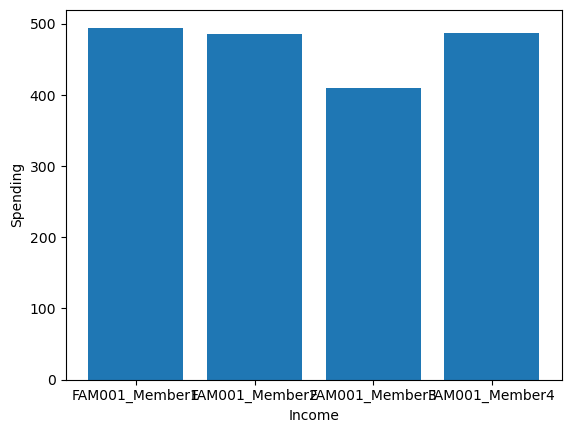

In [21]:
plt.bar(family_one['Member ID'] ,family_one['Amount'])
plt.xlabel('Income')
plt.ylabel("Spending")
plt.show()

In [22]:
family_level_insights.columns

Index(['Family ID', 'Family_Members_Total_Spending', 'family_members_count',
       'Income', 'Savings', 'Loan_amount', 'Credit_Card_Sepnding',
       'Monthly_Expenses', 'Dependents', 'Total_Spendings',
       'Financial_Goals_met', 'Savings_Ratio_Income'],
      dtype='object')

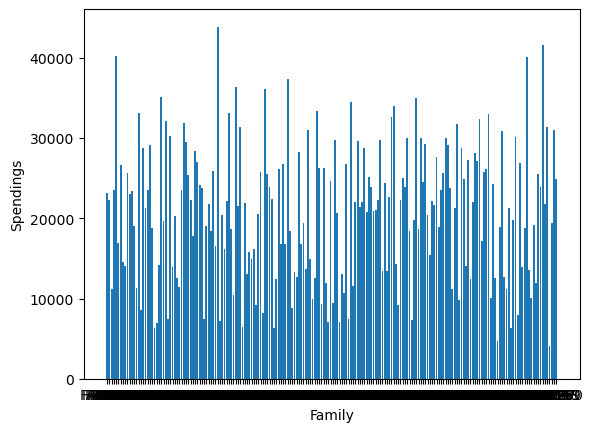

In [23]:
plt.bar(family_level_insights['Family ID'] , family_level_insights['Family_Members_Total_Spending'])
plt.xlabel("Family")
plt.ylabel('Spendings')
plt.show()

In [24]:
summary = data.groupby('Dependents').agg(
    Avg_Savings=('Savings', 'mean'),
    Avg_Goals_Met=('Financial Goals Met (%)', 'mean')
).reset_index()

print(summary)

   Dependents   Avg_Savings  Avg_Goals_Met
0           0  24324.136493      63.338389
1           1  24418.806265      65.518549
2           2  24762.052588      57.982195
3           3  24518.456568      59.094438
4           4  25305.049087      53.267409
5           5  23557.089882      63.231638


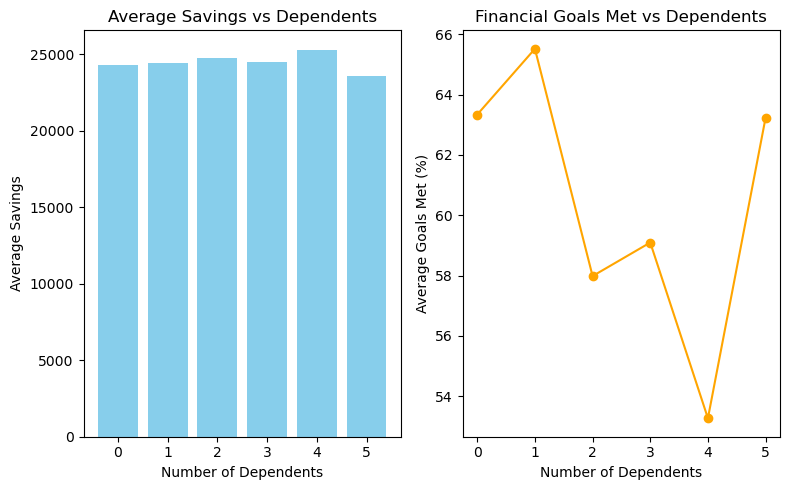

In [25]:
# Plot average savings by dependents
plt.figure(figsize=(8, 5))

# Bar plot for savings
plt.subplot(1, 2, 1)
plt.bar(summary['Dependents'], summary['Avg_Savings'], color='skyblue')
plt.title('Average Savings vs Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Average Savings')

# Line plot for financial goals met (%)
plt.subplot(1, 2, 2)
plt.plot(summary['Dependents'], summary['Avg_Goals_Met'], marker='o', color='orange')
plt.title('Financial Goals Met vs Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Average Goals Met (%)')

plt.tight_layout()
plt.show()


In [26]:
numeric_columns = family_level_insights.columns[1:]

In [27]:
# numeric_columns = ['Total_Spendings','Family_Members_Total_Spending' , "Income","Savings", "Loan_amount", 'Monthly_Expenses',"Savings_Ratio_Spendings",'Credit_Card_Sepnding' ,'family_members_count' , 'Financial_Goals_met']
correlation_data = family_level_insights[numeric_columns]
correlation_data.head()

Family_Members_Total_Spending  family_members_count  Income  Savings  \
0                       23188.90                     4  113810    20234   
1                       22309.71                     5   44592    29492   
2                       11220.34                     2   33278    11365   
3                       23483.10                     5  127196    30735   
4                       40246.21                     7   66048     1212   

   Loan_amount  Credit_Card_Sepnding  Monthly_Expenses  Dependents  \
0         2422                  2959              5781           2   
1         4541                   995              5630           2   
2         1042                  2818              5282           2   
3         1571                   668              3591           2   
4         3444                  1922              3136           2   

   Total_Spendings  Financial_Goals_met  Savings_Ratio_Income  
0         34350.90                 0.68              0.177788  
1         33475.71                 0.68              0.661374  
2         20362.34                 0.68              0.341517  
3         29313.10                 0.68              0.241635  
4         48748.21                 0.68              0.018350

In [28]:
correlation_matrix = correlation_data.corr()

In [29]:
correlation_matrix

Family_Members_Total_Spending  \
Family_Members_Total_Spending                       1.000000   
family_members_count                                0.876769   
Income                                              0.103071   
Savings                                            -0.007746   
Loan_amount                                        -0.087413   
Credit_Card_Sepnding                               -0.126425   
Monthly_Expenses                                    0.020799   
Dependents                                         -0.005096   
Total_Spendings                                     0.964043   
Financial_Goals_met                                 0.019287   
Savings_Ratio_Income                               -0.055093   

                               family_members_count    Income   Savings  \
Family_Members_Total_Spending              0.876769  0.103071 -0.007746   
family_members_count                       1.000000  0.021832 -0.014185   
Income                                     0.021832  1.000000 -0.108966   
Savings                                   -0.014185 -0.108966  1.000000   
Loan_amount                               -0.037203 -0.035110 -0.073023   
Credit_Card_Sepnding                      -0.058450 -0.111184  0.005792   
Monthly_Expenses                           0.043677 -0.068567 -0.062675   
Dependents                                -0.005311 -0.029560 -0.001326   
Total_Spendings                            0.861294  0.072514 -0.031848   
Financial_Goals_met                        0.016654  0.051276 -0.000722   
Savings_Ratio_Income                      -0.021291 -0.597991  0.747034   

                               Loan_amount  Credit_Card_Sepnding  \
Family_Members_Total_Spending    -0.087413             -0.126425   
family_members_count             -0.037203             -0.058450   
Income                           -0.035110             -0.111184   
Savings                          -0.073023              0.005792   
Loan_amount                       1.000000             -0.010601   
Credit_Card_Sepnding             -0.010601              1.000000   
Monthly_Expenses                 -0.027247             -0.057105   
Dependents                       -0.030241             -0.008055   
Total_Spendings                   0.072356             -0.053696   
Financial_Goals_met               0.014106             -0.022143   
Savings_Ratio_Income             -0.049142              0.081841   

                               Monthly_Expenses  Dependents  Total_Spendings  \
Family_Members_Total_Spending          0.020799   -0.005096         0.964043   
family_members_count                   0.043677   -0.005311         0.861294   
Income                                -0.068567   -0.029560         0.072514   
Savings                               -0.062675   -0.001326        -0.031848   
Loan_amount                           -0.027247   -0.030241         0.072356   
Credit_Card_Sepnding                  -0.057105   -0.008055        -0.053696   
Monthly_Expenses                       1.000000   -0.102659         0.213324   
Dependents                            -0.102659    1.000000        -0.031432   
Total_Spendings                        0.213324   -0.031432         1.000000   
Financial_Goals_met                    0.107673   -0.973415         0.041223   
Savings_Ratio_Income                   0.003126   -0.006914        -0.054845   

                               Financial_Goals_met  Savings_Ratio_Income  
Family_Members_Total_Spending             0.019287             -0.055093  
family_members_count                      0.016654             -0.021291  
Income                                    0.051276             -0.597991  
Savings                                  -0.000722              0.747034  
Loan_amount                               0.014106             -0.049142  
Credit_Card_Sepnding                     -0.022143              0.081841  
Monthly_Expenses                          0.107673        

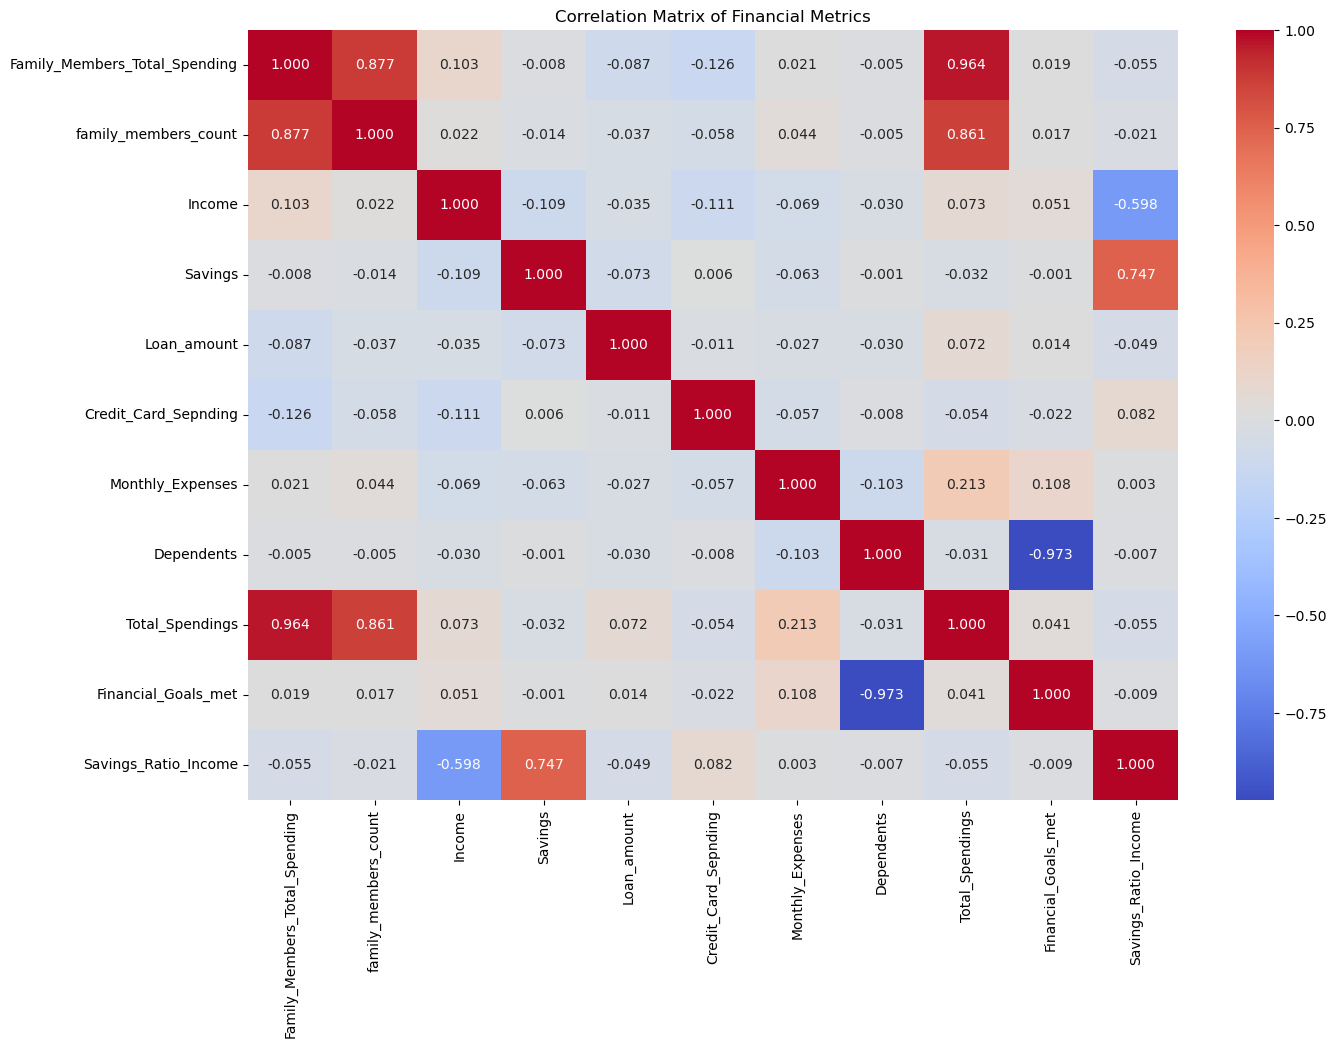

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


# Memeber Level Data Analysis 

In [31]:
data.groupby('Member ID').agg(
    Spend = ('Amount', 'sum')
)

Spend
Member ID              
FAM001_Member1  6521.20
FAM001_Member2  7084.83
FAM001_Member3  2119.41
FAM001_Member4  7463.46
FAM002_Member1  3082.90
...                 ...
FAM200_Member2  2103.85
FAM200_Member3  4671.33
FAM200_Member4  3739.52
FAM200_Member5  5408.28
FAM200_Member6  1837.73

[926 rows x 1 columns]

In [32]:
data.head()

Family ID       Member ID Transaction Date    Category  Amount  Income  \
0    FAM001  FAM001_Member1       2024-10-07      Travel  409.12  113810   
1    FAM001  FAM001_Member1       2024-10-16      Travel  270.91  113810   
2    FAM001  FAM001_Member1       2024-10-17   Groceries   91.10  113810   
3    FAM001  FAM001_Member1       2024-10-25  Healthcare  198.23  113810   
4    FAM001  FAM001_Member1       2024-10-25   Education  206.42  113810   

   Savings  Monthly Expenses  Loan Payments  Credit Card Spending  Dependents  \
0    20234              5781           2422                  2959           2   
1    20234              5781           2422                  2959           2   
2    20234              5781           2422                  2959           2   
3    20234              5781           2422                  2959           2   
4    20234              5781           2422                  2959           2   

   Financial Goals Met (%)  
0                       68  
1                       68  
2                       68  
3                       68  
4                       68

In [33]:
data['Financial Goals Met (%)'].unique()

array([ 68,  60, 100,  82,  89,  24,  99,  28,  50,  56,  49,  31,  75,
        32,  76,  41,  58,  23,  25,  61,  27,  57,  65,  67,  38,  51,
        87,  72,  92,  43,  42,  30,  98,  83,  94,  79,  52,  78,  21,
        40,  29,  64,  95,  74,  45,  69,  81,  33,  93,  22,  70,  55,
        26,  97,  48,  44,  37,  59,  66,  36,  73,  84,  54,  63,  34,
        91,  53,  88,  35,  80,  39,  47,  96,  62])

In [34]:
data.query('`Financial Goals Met (%)` == 100')

Family ID       Member ID Transaction Date       Category  Amount  \
181     FAM003  FAM003_Member1       2024-10-09      Education  489.46   
182     FAM003  FAM003_Member1       2024-10-25      Education  328.64   
183     FAM003  FAM003_Member1       2024-10-05      Groceries  486.12   
184     FAM003  FAM003_Member1       2024-10-16      Groceries  188.10   
185     FAM003  FAM003_Member1       2024-10-10      Education  210.43   
...        ...             ...              ...            ...     ...   
7391    FAM093  FAM093_Member2       2024-10-05      Utilities  346.82   
7392    FAM093  FAM093_Member2       2024-10-30         Travel  383.10   
7393    FAM093  FAM093_Member2       2024-10-10         Travel  196.58   
7394    FAM093  FAM093_Member2       2024-10-03  Entertainment  155.59   
7395    FAM093  FAM093_Member2       2024-10-13      Education   96.20   

      Income  Savings  Monthly Expenses  Loan Payments  Credit Card Spending  \
181    33278    11365              5282           1042                  2818   
182    33278    11365              5282           1042                  2818   
183    33278    11365              5282           1042                  2818   
184    33278    11365              5282           1042                  2818   
185    33278    11365              5282           1042                  2818   
...      ...      ...               ...            ...                   ...   
7391  113320    36339              4024           1133                  1258   
7392  113320    36339              4024           1133                  1258   
7393  113320    36339              4024           1133                  1258   
7394  113320    36339              4024           1133                  1258   
7395  113320    36339              4024           1133                  1258   

      Dependents  Financial Goals Met (%)  
181            0                      100  
182            0                      100  
183            0                      100  
184            0                      100  
185            0                      100  
...          ...                      ...  
7391           0                      100  
7392           0                      100  
7393           0                      100  
7394           0                      100  
7395           0                      100  

[250 rows x 12 columns]

In [35]:
data['Category'].unique()

array(['Travel', 'Groceries', 'Healthcare', 'Education', 'Utilities',
       'Food', 'Entertainment'], dtype=object)

In [36]:
data.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

In [37]:
data.groupby(['Family ID','Member ID']).agg(
    Amount  = ('Amount' , 'sum'),
      Family_Income = ('Income' , 'first'),
    Category_Spending=('Category', lambda x: x.value_counts(normalize=True).round(2).to_dict()) ,
    Monthly_Expenses = ('Monthly Expenses' , 'first') ,
    Credit_Card_Spending = ('Credit Card Spending', 'first'), 
  
    
).reset_index()

Family ID       Member ID   Amount  Family_Income  \
0      FAM001  FAM001_Member1  6521.20         113810   
1      FAM001  FAM001_Member2  7084.83         113810   
2      FAM001  FAM001_Member3  2119.41         113810   
3      FAM001  FAM001_Member4  7463.46         113810   
4      FAM002  FAM002_Member1  3082.90          44592   
..        ...             ...      ...            ...   
921    FAM200  FAM200_Member2  2103.85          44621   
922    FAM200  FAM200_Member3  4671.33          44621   
923    FAM200  FAM200_Member4  3739.52          44621   
924    FAM200  FAM200_Member5  5408.28          44621   
925    FAM200  FAM200_Member6  1837.73          44621   

                                     Category_Spending  Monthly_Expenses  \
0    {'Healthcare': 0.22, 'Entertainment': 0.22, 'U...              5781   
1    {'Travel': 0.24, 'Food': 0.21, 'Groceries': 0....              5781   
2    {'Education': 0.27, 'Entertainment': 0.27, 'Fo...              5781   
3    {'Entertainment': 0.27, 'Utilities': 0.19, 'Fo...              5781   
4    {'Healthcare': 0.25, 'Food': 0.25, 'Education'...              5630   
..                                                 ...               ...   
921  {'Food': 0.33, 'Healthcare': 0.22, 'Utilities'...              4296   
922  {'Food': 0.23, 'Travel': 0.18, 'Utilities': 0....              4296   
923  {'Food': 0.19, 'Healthcare': 0.19, 'Entertainm...              4296   
924  {'Travel': 0.4, 'Utilities': 0.15, 'Education'...              4296   
925  {'Travel': 0.38, 'Education': 0.25, 'Food': 0....              4296   

     Credit_Card_Spending  
0                    2959  
1                    2959  
2                    2959  
3                    2959  
4                     995  
..                    ...  
921                  2831  
922                  2831  
923                  2831  
924                  2831  
925                  2831  

[926 rows x 7 columns]

In [38]:
data.groupby(['Family ID' , 'Member ID']).agg(
    Amount  = ('Amount' , 'sum'),
      Family_Income = ('Income' , 'first'),
    Category_Spending=('Category', lambda x: x.value_counts(normalize=True).to_dict()) ,
    Monthly_Expenses = ('Monthly Expenses' , 'first') ,
    Credit_Card_Spending = ('Credit Card Spending', 'first'), 
    
  
    
).reset_index().query("`Credit_Card_Spending` == 2959").head()

Family ID       Member ID   Amount  Family_Income  \
0    FAM001  FAM001_Member1  6521.20         113810   
1    FAM001  FAM001_Member2  7084.83         113810   
2    FAM001  FAM001_Member3  2119.41         113810   
3    FAM001  FAM001_Member4  7463.46         113810   

                                   Category_Spending  Monthly_Expenses  \
0  {'Healthcare': 0.2222222222222222, 'Entertainm...              5781   
1  {'Travel': 0.2413793103448276, 'Food': 0.20689...              5781   
2  {'Education': 0.2727272727272727, 'Entertainme...              5781   
3  {'Entertainment': 0.2692307692307692, 'Utiliti...              5781   

   Credit_Card_Spending  
0                  2959  
1                  2959  
2                  2959  
3                  2959

In [39]:
data['Member ID'].nunique()

926

In [40]:
# Members Level spending pattern
member_level_insights  = data.groupby(['Family ID','Member ID']).agg(
    Amount  = ('Amount' , 'sum'),
      Family_Income = ('Income' , 'first'),
    Category_Spending=('Category', lambda x: x.value_counts(normalize=True).round(2).to_dict()) ,
    Monthly_Expenses = ('Monthly Expenses' , 'first') ,
    Credit_Card_Spending = ('Credit Card Spending', 'first'), 
  
    
).reset_index()

member_level_insights.head()

Family ID       Member ID   Amount  Family_Income  \
0    FAM001  FAM001_Member1  6521.20         113810   
1    FAM001  FAM001_Member2  7084.83         113810   
2    FAM001  FAM001_Member3  2119.41         113810   
3    FAM001  FAM001_Member4  7463.46         113810   
4    FAM002  FAM002_Member1  3082.90          44592   

                                   Category_Spending  Monthly_Expenses  \
0  {'Healthcare': 0.22, 'Entertainment': 0.22, 'U...              5781   
1  {'Travel': 0.24, 'Food': 0.21, 'Groceries': 0....              5781   
2  {'Education': 0.27, 'Entertainment': 0.27, 'Fo...              5781   
3  {'Entertainment': 0.27, 'Utilities': 0.19, 'Fo...              5781   
4  {'Healthcare': 0.25, 'Food': 0.25, 'Education'...              5630   

   Credit_Card_Spending  
0                  2959  
1                  2959  
2                  2959  
3                  2959  
4                   995

In [41]:
(member_level_insights['Amount'] /  member_level_insights['Family_Income']) * 100

0       5.729901
1       6.225138
2       1.862235
3       6.557824
4       6.913572
         ...    
921     4.714932
922    10.468905
923     8.380628
924    12.120481
925     4.118532
Length: 926, dtype: float64

In [42]:
# Speding percentage accroding to Family Income Spending Percentage=(Family IncomeSpending Amount​)×100
member_level_insights['Spending Perscentage'] = (member_level_insights['Amount'] /  member_level_insights['Family_Income']) * 100
member_level_insights.head()

Family ID       Member ID   Amount  Family_Income  \
0    FAM001  FAM001_Member1  6521.20         113810   
1    FAM001  FAM001_Member2  7084.83         113810   
2    FAM001  FAM001_Member3  2119.41         113810   
3    FAM001  FAM001_Member4  7463.46         113810   
4    FAM002  FAM002_Member1  3082.90          44592   

                                   Category_Spending  Monthly_Expenses  \
0  {'Healthcare': 0.22, 'Entertainment': 0.22, 'U...              5781   
1  {'Travel': 0.24, 'Food': 0.21, 'Groceries': 0....              5781   
2  {'Education': 0.27, 'Entertainment': 0.27, 'Fo...              5781   
3  {'Entertainment': 0.27, 'Utilities': 0.19, 'Fo...              5781   
4  {'Healthcare': 0.25, 'Food': 0.25, 'Education'...              5630   

   Credit_Card_Spending  Spending Perscentage  
0                  2959              5.729901  
1                  2959              6.225138  
2                  2959              1.862235  
3                  2959              6.557824  
4                   995              6.913572

In [43]:
type(member_level_insights['Category_Spending'].iloc[0])

dict

In [44]:
# # Before applying ast.literal_eval
# "{'Healthcare': 0.2222222222222222, 'Entertainment': 0.3333333333333333}"  # This is a string

# # After applying ast.literal_eval
# {'Healthcare': 0.2222222222222222, 'Entertainment': 0.3333333333333333}  # Now it's a Python dictionary
x = "{'Healthcare': 0.2222222222222222, 'Entertainment': 0.3333333333333333}"
ast.literal_eval(x)

{'Healthcare': 0.2222222222222222, 'Entertainment': 0.3333333333333333}

In [45]:

member_level_insights['Category_Spending'].apply(lambda x:x if isinstance(x ,dict)  else ast.literal_eval(x))

0      {'Healthcare': 0.22, 'Entertainment': 0.22, 'U...
1      {'Travel': 0.24, 'Food': 0.21, 'Groceries': 0....
2      {'Education': 0.27, 'Entertainment': 0.27, 'Fo...
3      {'Entertainment': 0.27, 'Utilities': 0.19, 'Fo...
4      {'Healthcare': 0.25, 'Food': 0.25, 'Education'...
                             ...                        
921    {'Food': 0.33, 'Healthcare': 0.22, 'Utilities'...
922    {'Food': 0.23, 'Travel': 0.18, 'Utilities': 0....
923    {'Food': 0.19, 'Healthcare': 0.19, 'Entertainm...
924    {'Travel': 0.4, 'Utilities': 0.15, 'Education'...
925    {'Travel': 0.38, 'Education': 0.25, 'Food': 0....
Name: Category_Spending, Length: 926, dtype: object

In [46]:
member_level_insights['Category_Spending'] = member_level_insights['Category_Spending'].apply(lambda x:x if isinstance(x ,dict)  else ast.literal_eval(x))
member_level_insights.head()

Family ID       Member ID   Amount  Family_Income  \
0    FAM001  FAM001_Member1  6521.20         113810   
1    FAM001  FAM001_Member2  7084.83         113810   
2    FAM001  FAM001_Member3  2119.41         113810   
3    FAM001  FAM001_Member4  7463.46         113810   
4    FAM002  FAM002_Member1  3082.90          44592   

                                   Category_Spending  Monthly_Expenses  \
0  {'Healthcare': 0.22, 'Entertainment': 0.22, 'U...              5781   
1  {'Travel': 0.24, 'Food': 0.21, 'Groceries': 0....              5781   
2  {'Education': 0.27, 'Entertainment': 0.27, 'Fo...              5781   
3  {'Entertainment': 0.27, 'Utilities': 0.19, 'Fo...              5781   
4  {'Healthcare': 0.25, 'Food': 0.25, 'Education'...              5630   

   Credit_Card_Spending  Spending Perscentage  
0                  2959              5.729901  
1                  2959              6.225138  
2                  2959              1.862235  
3                  2959              6.557824  
4                   995              6.913572

In [47]:
category_df = member_level_insights['Category_Spending'].apply(pd.Series)
category_df.fillna(0)

Healthcare  Entertainment  Utilities  Travel  Food  Groceries  Education
0          0.22           0.22       0.19    0.11  0.11       0.07       0.07
1          0.10           0.07       0.14    0.24  0.21       0.17       0.07
2          0.00           0.27       0.09    0.09  0.18       0.09       0.27
3          0.00           0.27       0.19    0.15  0.19       0.12       0.08
4          0.25           0.08       0.08    0.08  0.25       0.08       0.17
..          ...            ...        ...     ...   ...        ...        ...
921        0.22           0.11       0.11    0.11  0.33       0.00       0.11
922        0.14           0.14       0.18    0.18  0.23       0.09       0.05
923        0.19           0.12       0.12    0.12  0.19       0.12       0.12
924        0.05           0.15       0.15    0.40  0.10       0.00       0.15
925        0.00           0.12       0.00    0.38  0.12       0.12       0.25

[926 rows x 7 columns]

In [48]:
member_level_insights = pd.concat([member_level_insights.drop(columns=['Category_Spending']) , category_df.fillna(0)] , axis = 1)

Members Spending Data

In [49]:
member_level_insights.head()

Family ID       Member ID   Amount  Family_Income  Monthly_Expenses  \
0    FAM001  FAM001_Member1  6521.20         113810              5781   
1    FAM001  FAM001_Member2  7084.83         113810              5781   
2    FAM001  FAM001_Member3  2119.41         113810              5781   
3    FAM001  FAM001_Member4  7463.46         113810              5781   
4    FAM002  FAM002_Member1  3082.90          44592              5630   

   Credit_Card_Spending  Spending Perscentage  Healthcare  Entertainment  \
0                  2959              5.729901        0.22           0.22   
1                  2959              6.225138        0.10           0.07   
2                  2959              1.862235        0.00           0.27   
3                  2959              6.557824        0.00           0.27   
4                   995              6.913572        0.25           0.08   

   Utilities  Travel  Food  Groceries  Education  
0       0.19    0.11  0.11       0.07       0.07  
1       0.14    0.24  0.21       0.17       0.07  
2       0.09    0.09  0.18       0.09       0.27  
3       0.19    0.15  0.19       0.12       0.08  
4       0.08    0.08  0.25       0.08       0.17

In [50]:
member_level_insights.loc[2 , ["Healthcare", "Entertainment", "Utilities", "Travel", "Food" ,"Groceries"]].fillna(0)


Healthcare       0.00
Entertainment    0.27
Utilities        0.09
Travel           0.09
Food             0.18
Groceries        0.09
Name: 2, dtype: float64

One Family Member Spending Category 

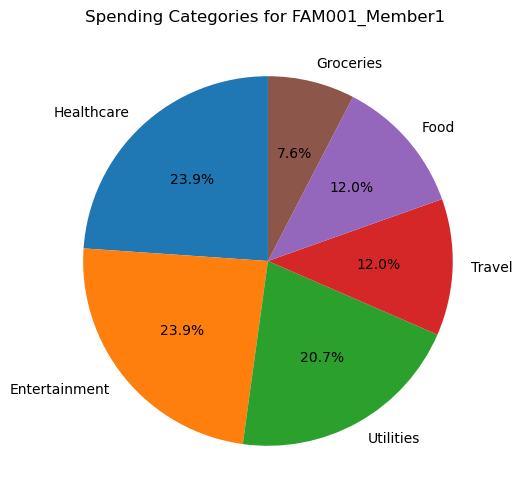

In [51]:
plt.figure(figsize=(6, 6))
member_level_insights.loc[0 , ["Healthcare", "Entertainment", "Utilities", "Travel", "Food" ,"Groceries"]].plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    ylabel='', 
    title="Spending Categories for FAM001_Member1 "
)
plt.show()

In [158]:
family_one_member_spending = member_level_insights.query("`Family ID` == 'FAM001'")

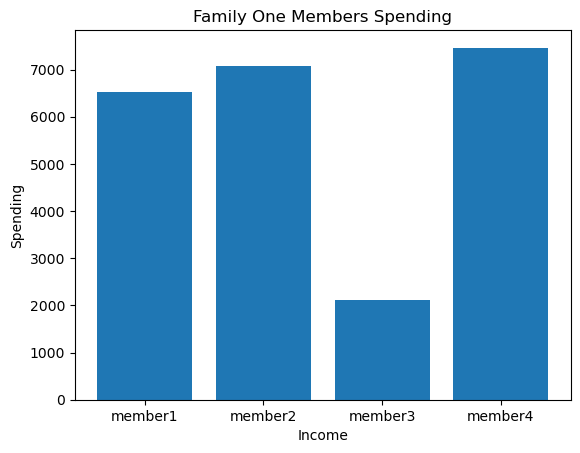

In [162]:
member_name = ['member1', 'member2' , 'member3', 'member4']
plt.bar(member_name ,family_one_member_spending['Amount'])
plt.xlabel('Income')
plt.ylabel("Spending")
plt.title("Family One Members Spending")
plt.show()

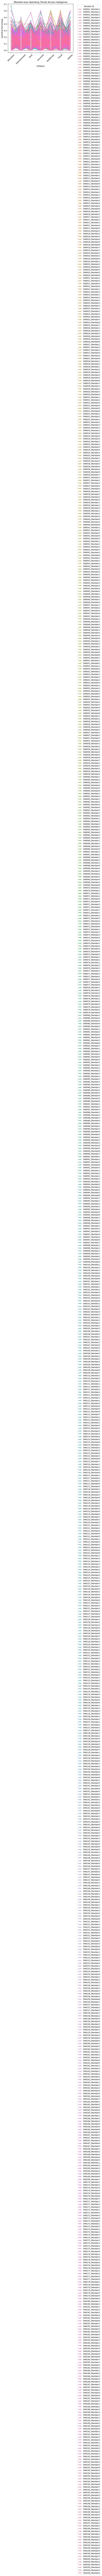

In [52]:

spending_trends = member_level_insights.melt(
    id_vars=['Family ID', 'Member ID'], 
    value_vars=['Education', 'Entertainment', 'Food', 'Groceries', 'Healthcare', 'Travel', 'Utilities'], 
    var_name='Category', 
    value_name='SpendingPct'
)

# Plot the trends
sns.lineplot(data=spending_trends, x='Category', y='SpendingPct', hue='Member ID', marker='o')
plt.title("Member-wise Spending Trends Across Categories")
plt.ylabel("Spending Percentage")
plt.xticks(rotation=45)
plt.legend(title='Member ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [53]:
numeric_columns_member = member_level_insights.columns[2:]
numeric_columns_member

Index(['Amount', 'Family_Income', 'Monthly_Expenses', 'Credit_Card_Spending',
       'Spending Perscentage', 'Healthcare', 'Entertainment', 'Utilities',
       'Travel', 'Food', 'Groceries', 'Education'],
      dtype='object')

In [54]:
correlation_data_members = member_level_insights[numeric_columns_member]
correlation_data_members.head()

Amount  Family_Income  Monthly_Expenses  Credit_Card_Spending  \
0  6521.20         113810              5781                  2959   
1  7084.83         113810              5781                  2959   
2  2119.41         113810              5781                  2959   
3  7463.46         113810              5781                  2959   
4  3082.90          44592              5630                   995   

   Spending Perscentage  Healthcare  Entertainment  Utilities  Travel  Food  \
0              5.729901        0.22           0.22       0.19    0.11  0.11   
1              6.225138        0.10           0.07       0.14    0.24  0.21   
2              1.862235        0.00           0.27       0.09    0.09  0.18   
3              6.557824        0.00           0.27       0.19    0.15  0.19   
4              6.913572        0.25           0.08       0.08    0.08  0.25   

   Groceries  Education  
0       0.07       0.07  
1       0.17       0.07  
2       0.09       0.27  
3       0.12       0.08  
4       0.08       0.17

In [55]:
correlation_matrix_member = correlation_data_members.corr()
correlation_matrix_member

Amount  Family_Income  Monthly_Expenses  \
Amount                1.000000       0.075966         -0.015912   
Family_Income         0.075966       1.000000         -0.054492   
Monthly_Expenses     -0.015912      -0.054492          1.000000   
Credit_Card_Spending -0.069237      -0.127931         -0.066893   
Spending Perscentage  0.627015      -0.608946          0.014546   
Healthcare           -0.002021       0.000051          0.021090   
Entertainment        -0.006751      -0.018376          0.003792   
Utilities             0.031350       0.028802         -0.049238   
Travel               -0.080855       0.014706         -0.063308   
Food                  0.060785      -0.007191          0.035377   
Groceries             0.011787      -0.015442          0.041025   
Education             0.001696      -0.007603          0.018753   

                      Credit_Card_Spending  Spending Perscentage  Healthcare  \
Amount                           -0.069237              0.627015   -0.002021   
Family_Income                    -0.127931             -0.608946    0.000051   
Monthly_Expenses                 -0.066893              0.014546    0.021090   
Credit_Card_Spending              1.000000              0.038642    0.012046   
Spending Perscentage              0.038642              1.000000   -0.002040   
Healthcare                        0.012046             -0.002040    1.000000   
Entertainment                    -0.025549              0.001212   -0.143681   
Utilities                         0.047618              0.015560   -0.125713   
Travel                           -0.020797             -0.045458   -0.162510   
Food                              0.003442              0.042232   -0.176416   
Groceries                         0.034544             -0.005236   -0.191849   
Education                        -0.052101              0.007408   -0.157454   

                      Entertainment  Utilities    Travel      Food  Groceries  \
Amount                    -0.006751   0.031350 -0.080855  0.060785   0.011787   
Family_Income             -0.018376   0.028802  0.014706 -0.007191  -0.015442   
Monthly_Expenses           0.003792  -0.049238 -0.063308  0.035377   0.041025   
Credit_Card_Spending      -0.025549   0.047618 -0.020797  0.003442   0.034544   
Spending Perscentage       0.001212   0.015560 -0.045458  0.042232  -0.005236   
Healthcare                -0.143681  -0.125713 -0.162510 -0.176416  -0.191849   
Entertainment              1.000000  -0.162110 -0.245564 -0.160562  -0.115551   
Utilities                 -0.162110   1.000000 -0.108133 -0.167278  -0.197722   
Travel                    -0.245564  -0.108133  1.000000 -0.157130  -0.235285   
Food                      -0.160562  -0.167278 -0.157130  1.000000  -0.136752   
Groceries                 -0.115551  -0.197722 -0.235285 -0.136752   1.000000   
Education                 -0.137694  -0.263002 -0.144746 -0.166839  -0.136588   

                      Education  
Amount                 0.001696  
Family_Income         -0.007603  
Monthly_Expenses       0.018753  
Credit_Card_Spending  -0.052101  
Spending Perscentage   0.007408  
Healthcare            -0.157454  
Entertainment         -0.137694  
Utilities             -0.263002  
Travel                -0.144746  
Food                  -0.166839  
Groceries             -0.136588  
Education              1.000000

# Heatmap of the correlation matrix of family level

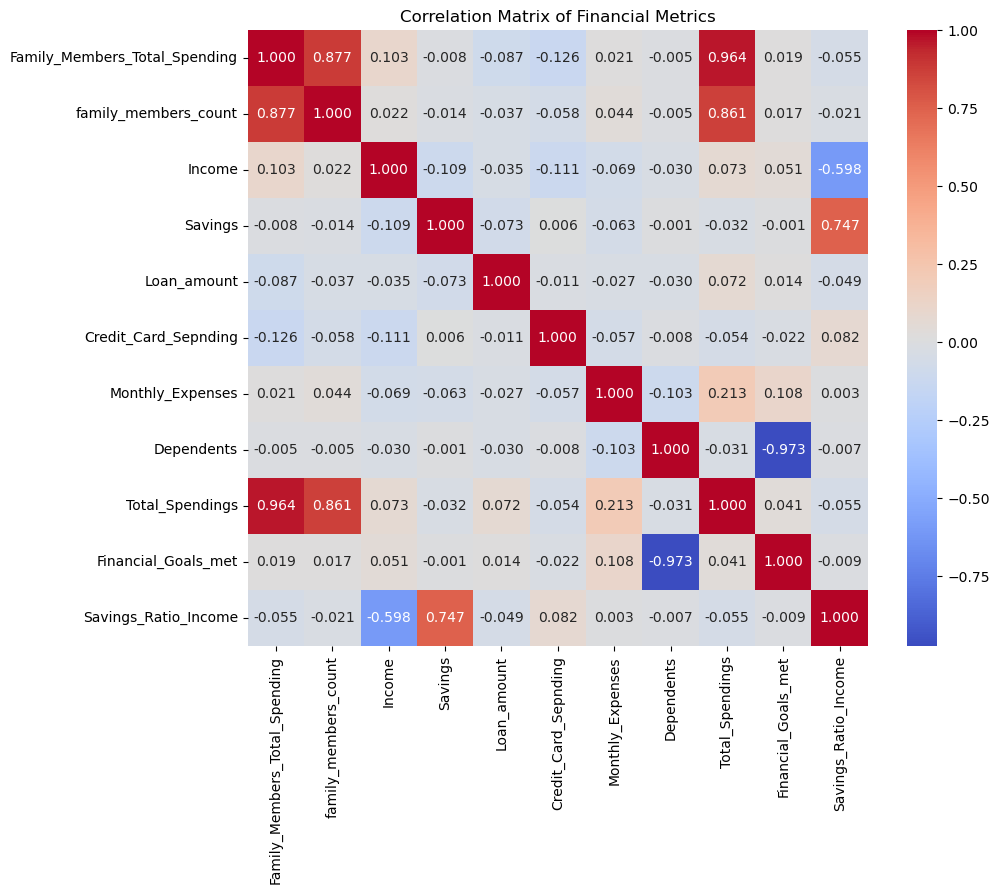

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


# Heatmap of correlation of member level data

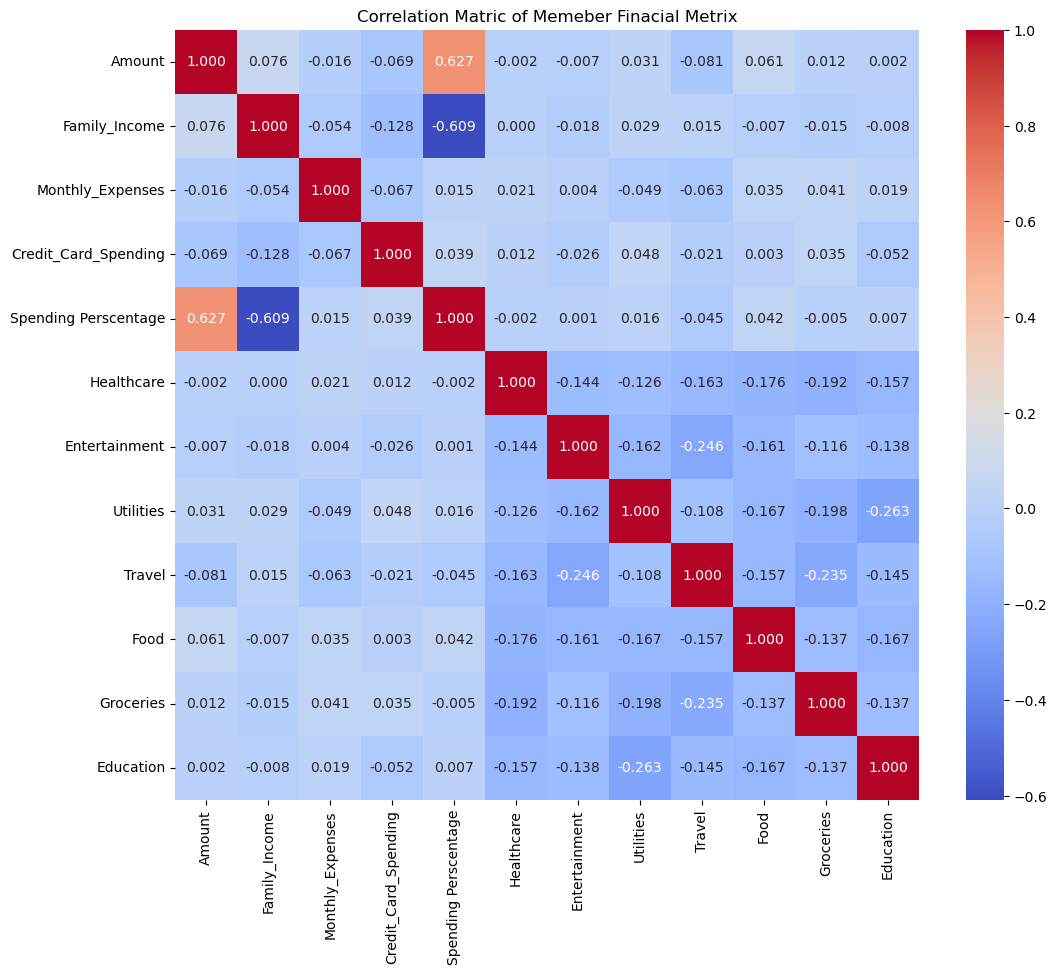

In [57]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_member , annot=True , cmap='coolwarm' , fmt=".3f")
plt.title("Correlation Matric of Memeber Finacial Metrix")
plt.show()

In [58]:
family_level_insights

Family ID  Family_Members_Total_Spending  family_members_count  Income  \
0      FAM001                       23188.90                     4  113810   
1      FAM002                       22309.71                     5   44592   
2      FAM003                       11220.34                     2   33278   
3      FAM004                       23483.10                     5  127196   
4      FAM005                       40246.21                     7   66048   
..        ...                            ...                   ...     ...   
195    FAM196                       31433.34                     7   64973   
196    FAM197                        4032.82                     2  130741   
197    FAM198                       19378.59                     4  114012   
198    FAM199                       31009.65                     7   74587   
199    FAM200                       24887.93                     6   44621   

     Savings  Loan_amount  Credit_Card_Sepnding  Monthly_Expenses  Dependents  \
0      20234         2422                  2959              5781           2   
1      29492         4541                   995              5630           2   
2      11365         1042                  2818              5282           2   
3      30735         1571                   668              3591           2   
4       1212         3444                  1922              3136           2   
..       ...          ...                   ...               ...         ...   
195     3604          622                   744              3533           0   
196    41591         4850                  1179              6463           0   
197     6372         1989                  1759              4345           0   
198    28474          834                  2937              3672           0   
199    44081         2470                  2831              4296           0   

     Total_Spendings  Financial_Goals_met  Savings_Ratio_Income  
0           34350.90                 0.68              0.177788  
1           33475.71                 0.68              0.661374  
2           20362.34                 0.68              0.341517  
3           29313.10                 0.68              0.241635  
4           48748.21                 0.68              0.018350  
..               ...                  ...                   ...  
195         36332.34                 1.00              0.055469  
196         16524.82                 1.00              0.318117  
197         27471.59                 1.00              0.055889  
198         38452.65                 1.00              0.381756  
199         34484.93                 1.00              0.987898  

[200 rows x 12 columns]

In [59]:
member_level_insights.head(2)

Family ID       Member ID   Amount  Family_Income  Monthly_Expenses  \
0    FAM001  FAM001_Member1  6521.20         113810              5781   
1    FAM001  FAM001_Member2  7084.83         113810              5781   

   Credit_Card_Spending  Spending Perscentage  Healthcare  Entertainment  \
0                  2959              5.729901        0.22           0.22   
1                  2959              6.225138        0.10           0.07   

   Utilities  Travel  Food  Groceries  Education  
0       0.19    0.11  0.11       0.07       0.07  
1       0.14    0.24  0.21       0.17       0.07

# OverAll Financial Data Analysis 

In [60]:
family_spending = data.groupby(['Family ID', 'Category'])['Amount'].sum().reset_index()
# Pivot to create a category-wise breakdown for each family
family_pivot = family_spending.pivot(index='Family ID', columns='Category', values='Amount').fillna(0)
# Calculate percentage spending for each category within a family
family_pivot_percentage = family_pivot.div(family_pivot.sum(axis=1), axis=0).round(2)



In [61]:
family_spending 

Family ID       Category   Amount
0       FAM001      Education  2251.01
1       FAM001  Entertainment  4168.86
2       FAM001           Food  4380.92
3       FAM001      Groceries  3410.61
4       FAM001     Healthcare  1575.89
...        ...            ...      ...
1393    FAM200           Food  4154.26
1394    FAM200      Groceries  1624.38
1395    FAM200     Healthcare  2149.66
1396    FAM200         Travel  4744.98
1397    FAM200      Utilities  5112.73

[1398 rows x 3 columns]

In [62]:
family_spending.isnull().sum()

Family ID    0
Category     0
Amount       0
dtype: int64

In [63]:
family_pivot = family_pivot.reset_index()

In [64]:
family_pivot = family_pivot.rename(columns={
    'Education':'Education_Amount',
    "Entertainment":"Entertainment_Amount",
    'Food':'Food_Amount',
    "Groceries":'Groceries_Amount',
    'Healthcare':'Healthcare_Amount',
    'Travel':'Travel_Amount' ,
    'Utilities':'Utilities_Amount'
})

In [65]:
family_pivot.head()

Category Family ID  Education_Amount  Entertainment_Amount  Food_Amount  \
0           FAM001           2251.01               4168.86      4380.92   
1           FAM002           1547.02               3397.26      2887.32   
2           FAM003           2469.63               1458.40       938.98   
3           FAM004           3979.54               3005.83      5174.30   
4           FAM005           5921.45               5647.39      4449.05   

Category  Groceries_Amount  Healthcare_Amount  Travel_Amount  Utilities_Amount  
0                  3410.61            1575.89        4576.81           2824.80  
1                  3532.67            3616.79        2321.25           5007.40  
2                  1674.84            1093.98        2478.68           1105.83  
3                  2626.72            3661.61        3218.79           1816.31  
4                  8802.50            3803.65        5773.51           5848.66

In [66]:
family_pivot_percentage = family_pivot_percentage.reset_index()
family_pivot_percentage

Category Family ID  Education  Entertainment  Food  Groceries  Healthcare  \
0           FAM001       0.10           0.18  0.19       0.15        0.07   
1           FAM002       0.07           0.15  0.13       0.16        0.16   
2           FAM003       0.22           0.13  0.08       0.15        0.10   
3           FAM004       0.17           0.13  0.22       0.11        0.16   
4           FAM005       0.15           0.14  0.11       0.22        0.09   
..             ...        ...            ...   ...        ...         ...   
195         FAM196       0.12           0.07  0.17       0.19        0.21   
196         FAM197       0.16           0.11  0.21       0.04        0.29   
197         FAM198       0.10           0.18  0.13       0.19        0.14   
198         FAM199       0.10           0.14  0.17       0.15        0.09   
199         FAM200       0.12           0.17  0.17       0.07        0.09   

Category  Travel  Utilities  
0           0.20       0.12  
1           0.10       0.22  
2           0.22       0.10  
3           0.14       0.08  
4           0.14       0.15  
..           ...        ...  
195         0.13       0.10  
196         0.07       0.12  
197         0.18       0.09  
198         0.12       0.23  
199         0.19       0.21  

[200 rows x 8 columns]

In [67]:
family_pivot_percentage = family_pivot_percentage.rename(columns={
    "Education":'Education_Percentage',
    "Entertainment":"Entertainment_Percentage",
    'Food':'Food_Percentage',
    'Healthcare':'Healthcare_Percentage',
    'Travel':'Travel_Percentage' ,
    "Groceries":'Groceries_Percentage',
    'Utilities':'Utilities_Percentage'
})

family_pivot_percentage.head()

Category Family ID  Education_Percentage  Entertainment_Percentage  \
0           FAM001                  0.10                      0.18   
1           FAM002                  0.07                      0.15   
2           FAM003                  0.22                      0.13   
3           FAM004                  0.17                      0.13   
4           FAM005                  0.15                      0.14   

Category  Food_Percentage  Groceries_Percentage  Healthcare_Percentage  \
0                    0.19                  0.15                   0.07   
1                    0.13                  0.16                   0.16   
2                    0.08                  0.15                   0.10   
3                    0.22                  0.11                   0.16   
4                    0.11                  0.22                   0.09   

Category  Travel_Percentage  Utilities_Percentage  
0                      0.20                  0.12  
1                      0.10                  0.22  
2                      0.22                  0.10  
3                      0.14                  0.08  
4                      0.14                  0.15

In [68]:
dataset  = member_level_insights.groupby('Family ID').agg(
    FamilyMembers_Spending_Amount = ('Amount' , 'sum'),
    FamilyMembers_Spending_percentage = ('Spending Perscentage' , 'sum'),

).reset_index()

In [69]:
dataset.head()

Family ID  FamilyMembers_Spending_Amount  FamilyMembers_Spending_percentage
0    FAM001                       23188.90                          20.375099
1    FAM002                       22309.71                          50.030745
2    FAM003                       11220.34                          33.716990
3    FAM004                       23483.10                          18.462137
4    FAM005                       40246.21                          60.934790

In [70]:
dataset = pd.concat([dataset , family_pivot.drop(columns=['Family ID'])]  , axis=1 )

In [71]:
dataset

Family ID  FamilyMembers_Spending_Amount  \
0      FAM001                       23188.90   
1      FAM002                       22309.71   
2      FAM003                       11220.34   
3      FAM004                       23483.10   
4      FAM005                       40246.21   
..        ...                            ...   
195    FAM196                       31433.34   
196    FAM197                        4032.82   
197    FAM198                       19378.59   
198    FAM199                       31009.65   
199    FAM200                       24887.93   

     FamilyMembers_Spending_percentage  Education_Amount  \
0                            20.375099           2251.01   
1                            50.030745           1547.02   
2                            33.716990           2469.63   
3                            18.462137           3979.54   
4                            60.934790           5921.45   
..                                 ...               ...   
195                          48.379081           3654.91   
196                           3.084587            649.13   
197                          16.996974           1888.18   
198                          41.575140           3183.50   
199                          55.776271           2939.31   

     Entertainment_Amount  Food_Amount  Groceries_Amount  Healthcare_Amount  \
0                 4168.86      4380.92           3410.61            1575.89   
1                 3397.26      2887.32           3532.67            3616.79   
2                 1458.40       938.98           1674.84            1093.98   
3                 3005.83      5174.30           2626.72            3661.61   
4                 5647.39      4449.05           8802.50            3803.65   
..                    ...          ...               ...                ...   
195               2312.54      5478.41           5953.19            6707.40   
196                437.89       842.95            176.34            1153.77   
197               3453.29      2462.23           3607.81            2655.81   
198               4411.54      5155.01           4668.34            2861.65   
199               4162.61      4154.26           1624.38            2149.66   

     Travel_Amount  Utilities_Amount  
0          4576.81           2824.80  
1          2321.25           5007.40  
2          2478.68           1105.83  
3          3218.79           1816.31  
4          5773.51           5848.66  
..             ...               ...  
195        4104.09           3222.80  
196         295.66            477.08  
197        3536.51           1774.76  
198        3704.75           7024.86  
199        4744.98           5112.73  

[200 rows x 10 columns]

In [72]:
dataset = pd.concat([dataset , family_pivot_percentage.drop(columns=['Family ID'])]  , axis=1 )

In [73]:
dataset

Family ID  FamilyMembers_Spending_Amount  \
0      FAM001                       23188.90   
1      FAM002                       22309.71   
2      FAM003                       11220.34   
3      FAM004                       23483.10   
4      FAM005                       40246.21   
..        ...                            ...   
195    FAM196                       31433.34   
196    FAM197                        4032.82   
197    FAM198                       19378.59   
198    FAM199                       31009.65   
199    FAM200                       24887.93   

     FamilyMembers_Spending_percentage  Education_Amount  \
0                            20.375099           2251.01   
1                            50.030745           1547.02   
2                            33.716990           2469.63   
3                            18.462137           3979.54   
4                            60.934790           5921.45   
..                                 ...               ...   
195                          48.379081           3654.91   
196                           3.084587            649.13   
197                          16.996974           1888.18   
198                          41.575140           3183.50   
199                          55.776271           2939.31   

     Entertainment_Amount  Food_Amount  Groceries_Amount  Healthcare_Amount  \
0                 4168.86      4380.92           3410.61            1575.89   
1                 3397.26      2887.32           3532.67            3616.79   
2                 1458.40       938.98           1674.84            1093.98   
3                 3005.83      5174.30           2626.72            3661.61   
4                 5647.39      4449.05           8802.50            3803.65   
..                    ...          ...               ...                ...   
195               2312.54      5478.41           5953.19            6707.40   
196                437.89       842.95            176.34            1153.77   
197               3453.29      2462.23           3607.81            2655.81   
198               4411.54      5155.01           4668.34            2861.65   
199               4162.61      4154.26           1624.38            2149.66   

     Travel_Amount  Utilities_Amount  Education_Percentage  \
0          4576.81           2824.80                  0.10   
1          2321.25           5007.40                  0.07   
2          2478.68           1105.83                  0.22   
3          3218.79           1816.31                  0.17   
4          5773.51           5848.66                  0.15   
..             ...               ...                   ...   
195        4104.09           3222.80                  0.12   
196         295.66            477.08                  0.16   
197        3536.51           1774.76                  0.10   
198        3704.75           7024.86                  0.10   
199        4744.98           5112.73                  0.12   

     Entertainment_Percentage  Food_Percentage  Groceries_Percentage  \
0                        0.18             0.19                  0.15   
1                        0.15             0.13                  0.16   
2                        0.13             0.08                  0.15   
3                        0.13             0.22                  0.11   
4                        0.14             0.11                  0.22   
..                        ...              ...                   ...   
195                      0.07             0.17                  0.19   
196                      0.11             0.21                  0.04   
197                      0.18             0.13                  0.19   
198                      0.14             0.17                  0.15   
199                      0.17             0.17                  0.07   

     Healthcare_Percentage  Travel_Percentage  Utilities_Percentage  
0                     0.07               0.20                  0.12  
1      

In [74]:
dataset = pd.concat([dataset , family_level_insights['Income']] , axis=1)
dataset

Family ID  FamilyMembers_Spending_Amount  \
0      FAM001                       23188.90   
1      FAM002                       22309.71   
2      FAM003                       11220.34   
3      FAM004                       23483.10   
4      FAM005                       40246.21   
..        ...                            ...   
195    FAM196                       31433.34   
196    FAM197                        4032.82   
197    FAM198                       19378.59   
198    FAM199                       31009.65   
199    FAM200                       24887.93   

     FamilyMembers_Spending_percentage  Education_Amount  \
0                            20.375099           2251.01   
1                            50.030745           1547.02   
2                            33.716990           2469.63   
3                            18.462137           3979.54   
4                            60.934790           5921.45   
..                                 ...               ...   
195                          48.379081           3654.91   
196                           3.084587            649.13   
197                          16.996974           1888.18   
198                          41.575140           3183.50   
199                          55.776271           2939.31   

     Entertainment_Amount  Food_Amount  Groceries_Amount  Healthcare_Amount  \
0                 4168.86      4380.92           3410.61            1575.89   
1                 3397.26      2887.32           3532.67            3616.79   
2                 1458.40       938.98           1674.84            1093.98   
3                 3005.83      5174.30           2626.72            3661.61   
4                 5647.39      4449.05           8802.50            3803.65   
..                    ...          ...               ...                ...   
195               2312.54      5478.41           5953.19            6707.40   
196                437.89       842.95            176.34            1153.77   
197               3453.29      2462.23           3607.81            2655.81   
198               4411.54      5155.01           4668.34            2861.65   
199               4162.61      4154.26           1624.38            2149.66   

     Travel_Amount  Utilities_Amount  Education_Percentage  \
0          4576.81           2824.80                  0.10   
1          2321.25           5007.40                  0.07   
2          2478.68           1105.83                  0.22   
3          3218.79           1816.31                  0.17   
4          5773.51           5848.66                  0.15   
..             ...               ...                   ...   
195        4104.09           3222.80                  0.12   
196         295.66            477.08                  0.16   
197        3536.51           1774.76                  0.10   
198        3704.75           7024.86                  0.10   
199        4744.98           5112.73                  0.12   

     Entertainment_Percentage  Food_Percentage  Groceries_Percentage  \
0                        0.18             0.19                  0.15   
1                        0.15             0.13                  0.16   
2                        0.13             0.08                  0.15   
3                        0.13             0.22                  0.11   
4                        0.14             0.11                  0.22   
..                        ...              ...                   ...   
195                      0.07             0.17                  0.19   
196                      0.11             0.21                  0.04   
197                      0.18             0.13                  0.19   
198                      0.14             0.17                  0.15   
199                      0.17             0.17                  0.07   

     Healthcare_Percentage  Travel_Percentage  Utilities_Percentage  Income  
0                     0.07               0.20                  0.12  

In [75]:
data.columns

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')

In [76]:
dataset = pd.concat([dataset ,family_level_insights['Loan_amount']],axis= 1)
dataset.columns

Index(['Family ID', 'FamilyMembers_Spending_Amount',
       'FamilyMembers_Spending_percentage', 'Education_Amount',
       'Entertainment_Amount', 'Food_Amount', 'Groceries_Amount',
       'Healthcare_Amount', 'Travel_Amount', 'Utilities_Amount',
       'Education_Percentage', 'Entertainment_Percentage', 'Food_Percentage',
       'Groceries_Percentage', 'Healthcare_Percentage', 'Travel_Percentage',
       'Utilities_Percentage', 'Income', 'Loan_amount'],
      dtype='object')

In [77]:
family_level_insights['Total_Spendings']

0      34350.90
1      33475.71
2      20362.34
3      29313.10
4      48748.21
         ...   
195    36332.34
196    16524.82
197    27471.59
198    38452.65
199    34484.93
Name: Total_Spendings, Length: 200, dtype: float64

In [78]:
family_level_insights.columns

Index(['Family ID', 'Family_Members_Total_Spending', 'family_members_count',
       'Income', 'Savings', 'Loan_amount', 'Credit_Card_Sepnding',
       'Monthly_Expenses', 'Dependents', 'Total_Spendings',
       'Financial_Goals_met', 'Savings_Ratio_Income'],
      dtype='object')

In [79]:
dataset = pd.concat([dataset ,family_level_insights[['Dependents','Savings_Ratio_Income','Financial_Goals_met','family_members_count','Savings','Monthly_Expenses','Credit_Card_Sepnding']]],axis= 1)

In [80]:
dataset

Family ID  FamilyMembers_Spending_Amount  \
0      FAM001                       23188.90   
1      FAM002                       22309.71   
2      FAM003                       11220.34   
3      FAM004                       23483.10   
4      FAM005                       40246.21   
..        ...                            ...   
195    FAM196                       31433.34   
196    FAM197                        4032.82   
197    FAM198                       19378.59   
198    FAM199                       31009.65   
199    FAM200                       24887.93   

     FamilyMembers_Spending_percentage  Education_Amount  \
0                            20.375099           2251.01   
1                            50.030745           1547.02   
2                            33.716990           2469.63   
3                            18.462137           3979.54   
4                            60.934790           5921.45   
..                                 ...               ...   
195                          48.379081           3654.91   
196                           3.084587            649.13   
197                          16.996974           1888.18   
198                          41.575140           3183.50   
199                          55.776271           2939.31   

     Entertainment_Amount  Food_Amount  Groceries_Amount  Healthcare_Amount  \
0                 4168.86      4380.92           3410.61            1575.89   
1                 3397.26      2887.32           3532.67            3616.79   
2                 1458.40       938.98           1674.84            1093.98   
3                 3005.83      5174.30           2626.72            3661.61   
4                 5647.39      4449.05           8802.50            3803.65   
..                    ...          ...               ...                ...   
195               2312.54      5478.41           5953.19            6707.40   
196                437.89       842.95            176.34            1153.77   
197               3453.29      2462.23           3607.81            2655.81   
198               4411.54      5155.01           4668.34            2861.65   
199               4162.61      4154.26           1624.38            2149.66   

     Travel_Amount  Utilities_Amount  ...  Utilities_Percentage  Income  \
0          4576.81           2824.80  ...                  0.12  113810   
1          2321.25           5007.40  ...                  0.22   44592   
2          2478.68           1105.83  ...                  0.10   33278   
3          3218.79           1816.31  ...                  0.08  127196   
4          5773.51           5848.66  ...                  0.15   66048   
..             ...               ...  ...                   ...     ...   
195        4104.09           3222.80  ...                  0.10   64973   
196         295.66            477.08  ...                  0.12  130741   
197        3536.51           1774.76  ...                  0.09  114012   
198        3704.75           7024.86  ...                  0.23   74587   
199        4744.98           5112.73  ...                  0.21   44621   

     Loan_amount  Dependents  Savings_Ratio_Income  Financial_Goals_met  \
0           2422           2              0.177788                 0.68   
1           4541           2              0.661374                 0.68   
2           1042           2              0.341517                 0.68   
3           1571           2              0.241635                 0.68   
4           3444           2              0.018350                 0.68   
..           ...         ...                   ...                  ...   
195          622           0              0.055469                 1.00   
196         4850           0              0.318117                 1.00   
197         1989           0              0.055889                 1.00   
198          834           0              0.381756                 1.00   
199         2470           0   

In [81]:
dataset = pd.concat([dataset ,family_level_insights['Total_Spendings']],axis= 1)

In [82]:
dataset.columns

Index(['Family ID', 'FamilyMembers_Spending_Amount',
       'FamilyMembers_Spending_percentage', 'Education_Amount',
       'Entertainment_Amount', 'Food_Amount', 'Groceries_Amount',
       'Healthcare_Amount', 'Travel_Amount', 'Utilities_Amount',
       'Education_Percentage', 'Entertainment_Percentage', 'Food_Percentage',
       'Groceries_Percentage', 'Healthcare_Percentage', 'Travel_Percentage',
       'Utilities_Percentage', 'Income', 'Loan_amount', 'Dependents',
       'Savings_Ratio_Income', 'Financial_Goals_met', 'family_members_count',
       'Savings', 'Monthly_Expenses', 'Credit_Card_Sepnding',
       'Total_Spendings'],
      dtype='object')

In [83]:
dataset.head(1)

Family ID  FamilyMembers_Spending_Amount  FamilyMembers_Spending_percentage  \
0    FAM001                        23188.9                          20.375099   

   Education_Amount  Entertainment_Amount  Food_Amount  Groceries_Amount  \
0           2251.01               4168.86      4380.92           3410.61   

   Healthcare_Amount  Travel_Amount  Utilities_Amount  ...  Income  \
0            1575.89        4576.81            2824.8  ...  113810   

   Loan_amount  Dependents  Savings_Ratio_Income  Financial_Goals_met  \
0         2422           2              0.177788                 0.68   

   family_members_count  Savings  Monthly_Expenses  Credit_Card_Sepnding  \
0                     4    20234              5781                  2959   

   Total_Spendings  
0          34350.9  

[1 rows x 27 columns]

In [84]:
dataset.columns

Index(['Family ID', 'FamilyMembers_Spending_Amount',
       'FamilyMembers_Spending_percentage', 'Education_Amount',
       'Entertainment_Amount', 'Food_Amount', 'Groceries_Amount',
       'Healthcare_Amount', 'Travel_Amount', 'Utilities_Amount',
       'Education_Percentage', 'Entertainment_Percentage', 'Food_Percentage',
       'Groceries_Percentage', 'Healthcare_Percentage', 'Travel_Percentage',
       'Utilities_Percentage', 'Income', 'Loan_amount', 'Dependents',
       'Savings_Ratio_Income', 'Financial_Goals_met', 'family_members_count',
       'Savings', 'Monthly_Expenses', 'Credit_Card_Sepnding',
       'Total_Spendings'],
      dtype='object')

In [85]:
dataset.columns

Index(['Family ID', 'FamilyMembers_Spending_Amount',
       'FamilyMembers_Spending_percentage', 'Education_Amount',
       'Entertainment_Amount', 'Food_Amount', 'Groceries_Amount',
       'Healthcare_Amount', 'Travel_Amount', 'Utilities_Amount',
       'Education_Percentage', 'Entertainment_Percentage', 'Food_Percentage',
       'Groceries_Percentage', 'Healthcare_Percentage', 'Travel_Percentage',
       'Utilities_Percentage', 'Income', 'Loan_amount', 'Dependents',
       'Savings_Ratio_Income', 'Financial_Goals_met', 'family_members_count',
       'Savings', 'Monthly_Expenses', 'Credit_Card_Sepnding',
       'Total_Spendings'],
      dtype='object')

In [86]:
new_order = ['Family ID' ,'Income','family_members_count' ,'FamilyMembers_Spending_Amount',
             'Education_Amount','Entertainment_Amount', 'Food_Amount','Groceries_Amount',
             'Healthcare_Amount','Travel_Amount','Utilities_Amount','Education_Percentage','Entertainment_Percentage','Food_Percentage',
              'Groceries_Percentage' ,'Healthcare_Percentage' ,'Travel_Percentage','Utilities_Percentage','FamilyMembers_Spending_percentage','Loan_amount',
              
                'Credit_Card_Sepnding' , 'Dependents','Monthly_Expenses' ,'Total_Spendings',  'Savings' ,'Savings_Ratio_Income' ,'Financial_Goals_met'
             ]



In [87]:
dataset = dataset[new_order]
dataset.head()

Family ID  Income  family_members_count  FamilyMembers_Spending_Amount  \
0    FAM001  113810                     4                       23188.90   
1    FAM002   44592                     5                       22309.71   
2    FAM003   33278                     2                       11220.34   
3    FAM004  127196                     5                       23483.10   
4    FAM005   66048                     7                       40246.21   

   Education_Amount  Entertainment_Amount  Food_Amount  Groceries_Amount  \
0           2251.01               4168.86      4380.92           3410.61   
1           1547.02               3397.26      2887.32           3532.67   
2           2469.63               1458.40       938.98           1674.84   
3           3979.54               3005.83      5174.30           2626.72   
4           5921.45               5647.39      4449.05           8802.50   

   Healthcare_Amount  Travel_Amount  ...  Utilities_Percentage  \
0            1575.89        4576.81  ...                  0.12   
1            3616.79        2321.25  ...                  0.22   
2            1093.98        2478.68  ...                  0.10   
3            3661.61        3218.79  ...                  0.08   
4            3803.65        5773.51  ...                  0.15   

   FamilyMembers_Spending_percentage  Loan_amount  Credit_Card_Sepnding  \
0                          20.375099         2422                  2959   
1                          50.030745         4541                   995   
2                          33.716990         1042                  2818   
3                          18.462137         1571                   668   
4                          60.934790         3444                  1922   

   Dependents  Monthly_Expenses  Total_Spendings  Savings  \
0           2              5781         34350.90    20234   
1           2              5630         33475.71    29492   
2           2              5282         20362.34    11365   
3           2              3591         29313.10    30735   
4           2              3136         48748.21     1212   

   Savings_Ratio_Income  Financial_Goals_met  
0              0.177788                 0.68  
1              0.661374                 0.68  
2              0.341517                 0.68  
3              0.241635                 0.68  
4              0.018350                 0.68  

[5 rows x 27 columns]

In [88]:
dataset.drop(columns=['Monthly_Expenses'] , inplace= True)

In [89]:
dataset

Family ID  Income  family_members_count  FamilyMembers_Spending_Amount  \
0      FAM001  113810                     4                       23188.90   
1      FAM002   44592                     5                       22309.71   
2      FAM003   33278                     2                       11220.34   
3      FAM004  127196                     5                       23483.10   
4      FAM005   66048                     7                       40246.21   
..        ...     ...                   ...                            ...   
195    FAM196   64973                     7                       31433.34   
196    FAM197  130741                     2                        4032.82   
197    FAM198  114012                     4                       19378.59   
198    FAM199   74587                     7                       31009.65   
199    FAM200   44621                     6                       24887.93   

     Education_Amount  Entertainment_Amount  Food_Amount  Groceries_Amount  \
0             2251.01               4168.86      4380.92           3410.61   
1             1547.02               3397.26      2887.32           3532.67   
2             2469.63               1458.40       938.98           1674.84   
3             3979.54               3005.83      5174.30           2626.72   
4             5921.45               5647.39      4449.05           8802.50   
..                ...                   ...          ...               ...   
195           3654.91               2312.54      5478.41           5953.19   
196            649.13                437.89       842.95            176.34   
197           1888.18               3453.29      2462.23           3607.81   
198           3183.50               4411.54      5155.01           4668.34   
199           2939.31               4162.61      4154.26           1624.38   

     Healthcare_Amount  Travel_Amount  ...  Travel_Percentage  \
0              1575.89        4576.81  ...               0.20   
1              3616.79        2321.25  ...               0.10   
2              1093.98        2478.68  ...               0.22   
3              3661.61        3218.79  ...               0.14   
4              3803.65        5773.51  ...               0.14   
..                 ...            ...  ...                ...   
195            6707.40        4104.09  ...               0.13   
196            1153.77         295.66  ...               0.07   
197            2655.81        3536.51  ...               0.18   
198            2861.65        3704.75  ...               0.12   
199            2149.66        4744.98  ...               0.19   

     Utilities_Percentage  FamilyMembers_Spending_percentage  Loan_amount  \
0                    0.12                          20.375099         2422   
1                    0.22                          50.030745         4541   
2                    0.10                          33.716990         1042   
3                    0.08                          18.462137         1571   
4                    0.15                          60.934790         3444   
..                    ...                                ...          ...   
195                  0.10                          48.379081          622   
196                  0.12                           3.084587         4850   
197                  0.09                          16.996974         1989   
198                  0.23                          41.575140          834   
199                  0.21                          55.776271         2470   

     Credit_Card_Sepnding  Dependents  Total_Spendings  Savings  \
0                    2959           2         34350.90    20234   
1                     995           2         33475.71    29492   
2                    2818           2         20362.34    11365   
3                     668           2         29313.10    30735   
4                    1922           2         48748.21     1212   
..                    

In [90]:
((dataset['Total_Spendings'] /  dataset['Income']) * 100).round(2)

0      30.18
1      75.07
2      61.19
3      23.05
4      73.81
       ...  
195    55.92
196    12.64
197    24.10
198    51.55
199    77.28
Length: 200, dtype: float64

In [91]:
dataset['Spending_income_ratio'] = (dataset['Total_Spendings'] /  dataset['Income']).round(2)

In [92]:
dataset.head()

Family ID  Income  family_members_count  FamilyMembers_Spending_Amount  \
0    FAM001  113810                     4                       23188.90   
1    FAM002   44592                     5                       22309.71   
2    FAM003   33278                     2                       11220.34   
3    FAM004  127196                     5                       23483.10   
4    FAM005   66048                     7                       40246.21   

   Education_Amount  Entertainment_Amount  Food_Amount  Groceries_Amount  \
0           2251.01               4168.86      4380.92           3410.61   
1           1547.02               3397.26      2887.32           3532.67   
2           2469.63               1458.40       938.98           1674.84   
3           3979.54               3005.83      5174.30           2626.72   
4           5921.45               5647.39      4449.05           8802.50   

   Healthcare_Amount  Travel_Amount  ...  Utilities_Percentage  \
0            1575.89        4576.81  ...                  0.12   
1            3616.79        2321.25  ...                  0.22   
2            1093.98        2478.68  ...                  0.10   
3            3661.61        3218.79  ...                  0.08   
4            3803.65        5773.51  ...                  0.15   

   FamilyMembers_Spending_percentage  Loan_amount  Credit_Card_Sepnding  \
0                          20.375099         2422                  2959   
1                          50.030745         4541                   995   
2                          33.716990         1042                  2818   
3                          18.462137         1571                   668   
4                          60.934790         3444                  1922   

   Dependents  Total_Spendings  Savings  Savings_Ratio_Income  \
0           2         34350.90    20234              0.177788   
1           2         33475.71    29492              0.661374   
2           2         20362.34    11365              0.341517   
3           2         29313.10    30735              0.241635   
4           2         48748.21     1212              0.018350   

   Financial_Goals_met  Spending_income_ratio  
0                 0.68                   0.30  
1                 0.68                   0.75  
2                 0.68                   0.61  
3                 0.68                   0.23  
4                 0.68                   0.74  

[5 rows x 27 columns]

In [93]:
rename_dict = {
    'Family ID': 'FamID',
    'Income': 'Income',
    'family_members_count': 'MembersCount',
    'FamilyMembers_Spending_Amount': 'SpendAmount',
    'Education_Amount': 'EduAmt',
    'Entertainment_Amount': 'EntertainAmt',
    'Food_Amount': 'FoodAmt',
    'Groceries_Amount': 'GroceryAmt',
    'Healthcare_Amount': 'HealthAmt',
    'Travel_Amount': 'TravelAmt',
    'Utilities_Amount': 'UtilAmt',
    'Education_Percentage': 'EduPct',
    'Entertainment_Percentage': 'EntertainPct',
    'Food_Percentage': 'FoodPct',
    'Groceries_Percentage': 'GroceryPct',
    'Healthcare_Percentage': 'HealthPct',
    'Travel_Percentage': 'TravelPct',
    'Utilities_Percentage': 'UtilPct',
    'FamilyMembers_Spending_percentage': 'SpendPct',
    'Loan_amount': 'LoanAmt',
    'Credit_Card_Sepnding': 'CreditSpend',
    'Dependents': 'Dependents',
    'Monthly_Expenses': 'MonthlyExp',
    'Total_Spendings': 'TotalSpend',
    'Savings': 'Savings',
    'Savings_Ratio_Income': 'SavingsRatio',
    'Financial_Goals_met': 'GoalsMet'
}




In [94]:
dataset = dataset.rename(columns=rename_dict)


In [95]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  ...  UtilPct   SpendPct  \
0    4380.92     3410.61    1575.89    4576.81  ...     0.12  20.375099   
1    2887.32     3532.67    3616.79    2321.25  ...     0.22  50.030745   
2     938.98     1674.84    1093.98    2478.68  ...     0.10  33.716990   
3    5174.30     2626.72    3661.61    3218.79  ...     0.08  18.462137   
4    4449.05     8802.50    3803.65    5773.51  ...     0.15  60.934790   
..       ...         ...        ...        ...  ...      ...        ...   
195  5478.41     5953.19    6707.40    4104.09  ...     0.10  48.379081   
196   842.95      176.34    1153.77     295.66  ...     0.12   3.084587   
197  2462.23     3607.81    2655.81    3536.51  ...     0.09  16.996974   
198  5155.01     4668.34    2861.65    3704.75  ...     0.23  41.575140   
199  4154.26     1624.38    2149.66    4744.98  ...     0.21  55.776271   

     LoanAmt  CreditSpend  Dependents  TotalSpend  Savings  SavingsRatio  \
0       2422         2959           2    34350.90    20234      0.177788   
1       4541          995           2    33475.71    29492      0.661374   
2       1042         2818           2    20362.34    11365      0.341517   
3       1571          668           2    29313.10    30735      0.241635   
4       3444         1922           2    48748.21     1212      0.018350   
..       ...          ...         ...         ...      ...           ...   
195      622          744           0    36332.34     3604      0.055469   
196     4850         1179           0    16524.82    41591      0.318117   
197     1989         1759           0    27471.59     6372      0.055889   
198      834         2937           0    38452.65    28474      0.381756   
199     2470         2831           0    34484.93    44081      0.987898   

     GoalsMet  Spending_income_ratio  
0        0.68                   0.30  
1        0.68                   0.75  
2        0.68                   0.61  
3        0.68                   0.23  
4        0.68                   0.74  
..        ...                    ...  
195      1.00                   0.56  
196      1.00                   0.13  
197      1.00                   0.24  
198      1.00                   0.52  
199      1.00                   0.77  

[200 rows x 27 columns]

In [96]:
dataset['SpendPct'] = dataset['SpendPct']/100

In [97]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  ...  UtilPct  SpendPct  \
0    4380.92     3410.61    1575.89    4576.81  ...     0.12  0.203751   
1    2887.32     3532.67    3616.79    2321.25  ...     0.22  0.500307   
2     938.98     1674.84    1093.98    2478.68  ...     0.10  0.337170   
3    5174.30     2626.72    3661.61    3218.79  ...     0.08  0.184621   
4    4449.05     8802.50    3803.65    5773.51  ...     0.15  0.609348   
..       ...         ...        ...        ...  ...      ...       ...   
195  5478.41     5953.19    6707.40    4104.09  ...     0.10  0.483791   
196   842.95      176.34    1153.77     295.66  ...     0.12  0.030846   
197  2462.23     3607.81    2655.81    3536.51  ...     0.09  0.169970   
198  5155.01     4668.34    2861.65    3704.75  ...     0.23  0.415751   
199  4154.26     1624.38    2149.66    4744.98  ...     0.21  0.557763   

     LoanAmt  CreditSpend  Dependents  TotalSpend  Savings  SavingsRatio  \
0       2422         2959           2    34350.90    20234      0.177788   
1       4541          995           2    33475.71    29492      0.661374   
2       1042         2818           2    20362.34    11365      0.341517   
3       1571          668           2    29313.10    30735      0.241635   
4       3444         1922           2    48748.21     1212      0.018350   
..       ...          ...         ...         ...      ...           ...   
195      622          744           0    36332.34     3604      0.055469   
196     4850         1179           0    16524.82    41591      0.318117   
197     1989         1759           0    27471.59     6372      0.055889   
198      834         2937           0    38452.65    28474      0.381756   
199     2470         2831           0    34484.93    44081      0.987898   

     GoalsMet  Spending_income_ratio  
0        0.68                   0.30  
1        0.68                   0.75  
2        0.68                   0.61  
3        0.68                   0.23  
4        0.68                   0.74  
..        ...                    ...  
195      1.00                   0.56  
196      1.00                   0.13  
197      1.00                   0.24  
198      1.00                   0.52  
199      1.00                   0.77  

[200 rows x 27 columns]

In [98]:
dataset['Loan_income_Pct']=  (dataset['LoanAmt'] / dataset['Income']*100).round(2)
dataset['CreditSpend_Pct']= (dataset['CreditSpend'] / dataset['Income']*100).round(2)

In [99]:
dataset.head()

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  FoodAmt  \
0  FAM001  113810             4     23188.90  2251.01       4168.86  4380.92   
1  FAM002   44592             5     22309.71  1547.02       3397.26  2887.32   
2  FAM003   33278             2     11220.34  2469.63       1458.40   938.98   
3  FAM004  127196             5     23483.10  3979.54       3005.83  5174.30   
4  FAM005   66048             7     40246.21  5921.45       5647.39  4449.05   

   GroceryAmt  HealthAmt  TravelAmt  ...  LoanAmt  CreditSpend  Dependents  \
0     3410.61    1575.89    4576.81  ...     2422         2959           2   
1     3532.67    3616.79    2321.25  ...     4541          995           2   
2     1674.84    1093.98    2478.68  ...     1042         2818           2   
3     2626.72    3661.61    3218.79  ...     1571          668           2   
4     8802.50    3803.65    5773.51  ...     3444         1922           2   

   TotalSpend  Savings  SavingsRatio  GoalsMet  Spending_income_ratio  \
0    34350.90    20234      0.177788      0.68                   0.30   
1    33475.71    29492      0.661374      0.68                   0.75   
2    20362.34    11365      0.341517      0.68                   0.61   
3    29313.10    30735      0.241635      0.68                   0.23   
4    48748.21     1212      0.018350      0.68                   0.74   

   Loan_income_Pct  CreditSpend_Pct  
0             2.13             2.60  
1            10.18             2.23  
2             3.13             8.47  
3             1.24             0.53  
4             5.21             2.91  

[5 rows x 29 columns]

In [100]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  ...  LoanAmt  CreditSpend  \
0    4380.92     3410.61    1575.89    4576.81  ...     2422         2959   
1    2887.32     3532.67    3616.79    2321.25  ...     4541          995   
2     938.98     1674.84    1093.98    2478.68  ...     1042         2818   
3    5174.30     2626.72    3661.61    3218.79  ...     1571          668   
4    4449.05     8802.50    3803.65    5773.51  ...     3444         1922   
..       ...         ...        ...        ...  ...      ...          ...   
195  5478.41     5953.19    6707.40    4104.09  ...      622          744   
196   842.95      176.34    1153.77     295.66  ...     4850         1179   
197  2462.23     3607.81    2655.81    3536.51  ...     1989         1759   
198  5155.01     4668.34    2861.65    3704.75  ...      834         2937   
199  4154.26     1624.38    2149.66    4744.98  ...     2470         2831   

     Dependents  TotalSpend  Savings  SavingsRatio  GoalsMet  \
0             2    34350.90    20234      0.177788      0.68   
1             2    33475.71    29492      0.661374      0.68   
2             2    20362.34    11365      0.341517      0.68   
3             2    29313.10    30735      0.241635      0.68   
4             2    48748.21     1212      0.018350      0.68   
..          ...         ...      ...           ...       ...   
195           0    36332.34     3604      0.055469      1.00   
196           0    16524.82    41591      0.318117      1.00   
197           0    27471.59     6372      0.055889      1.00   
198           0    38452.65    28474      0.381756      1.00   
199           0    34484.93    44081      0.987898      1.00   

     Spending_income_ratio  Loan_income_Pct  CreditSpend_Pct  
0                     0.30             2.13             2.60  
1                     0.75            10.18             2.23  
2                     0.61             3.13             8.47  
3                     0.23             1.24             0.53  
4                     0.74             5.21             2.91  
..                     ...              ...              ...  
195                   0.56             0.96             1.15  
196                   0.13             3.71             0.90  
197                   0.24             1.74             1.54  
198                   0.52             1.12             3.94  
199                   0.77             5.54             6.34  

[200 rows x 29 columns]

In [101]:
dataset.columns

Index(['FamID', 'Income', 'MembersCount', 'SpendAmount', 'EduAmt',
       'EntertainAmt', 'FoodAmt', 'GroceryAmt', 'HealthAmt', 'TravelAmt',
       'UtilAmt', 'EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct',
       'HealthPct', 'TravelPct', 'UtilPct', 'SpendPct', 'LoanAmt',
       'CreditSpend', 'Dependents', 'TotalSpend', 'Savings', 'SavingsRatio',
       'GoalsMet', 'Spending_income_ratio', 'Loan_income_Pct',
       'CreditSpend_Pct'],
      dtype='object')

In [102]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  ...  LoanAmt  CreditSpend  \
0    4380.92     3410.61    1575.89    4576.81  ...     2422         2959   
1    2887.32     3532.67    3616.79    2321.25  ...     4541          995   
2     938.98     1674.84    1093.98    2478.68  ...     1042         2818   
3    5174.30     2626.72    3661.61    3218.79  ...     1571          668   
4    4449.05     8802.50    3803.65    5773.51  ...     3444         1922   
..       ...         ...        ...        ...  ...      ...          ...   
195  5478.41     5953.19    6707.40    4104.09  ...      622          744   
196   842.95      176.34    1153.77     295.66  ...     4850         1179   
197  2462.23     3607.81    2655.81    3536.51  ...     1989         1759   
198  5155.01     4668.34    2861.65    3704.75  ...      834         2937   
199  4154.26     1624.38    2149.66    4744.98  ...     2470         2831   

     Dependents  TotalSpend  Savings  SavingsRatio  GoalsMet  \
0             2    34350.90    20234      0.177788      0.68   
1             2    33475.71    29492      0.661374      0.68   
2             2    20362.34    11365      0.341517      0.68   
3             2    29313.10    30735      0.241635      0.68   
4             2    48748.21     1212      0.018350      0.68   
..          ...         ...      ...           ...       ...   
195           0    36332.34     3604      0.055469      1.00   
196           0    16524.82    41591      0.318117      1.00   
197           0    27471.59     6372      0.055889      1.00   
198           0    38452.65    28474      0.381756      1.00   
199           0    34484.93    44081      0.987898      1.00   

     Spending_income_ratio  Loan_income_Pct  CreditSpend_Pct  
0                     0.30             2.13             2.60  
1                     0.75            10.18             2.23  
2                     0.61             3.13             8.47  
3                     0.23             1.24             0.53  
4                     0.74             5.21             2.91  
..                     ...              ...              ...  
195                   0.56             0.96             1.15  
196                   0.13             3.71             0.90  
197                   0.24             1.74             1.54  
198                   0.52             1.12             3.94  
199                   0.77             5.54             6.34  

[200 rows x 29 columns]

In [103]:
dataset.columns

Index(['FamID', 'Income', 'MembersCount', 'SpendAmount', 'EduAmt',
       'EntertainAmt', 'FoodAmt', 'GroceryAmt', 'HealthAmt', 'TravelAmt',
       'UtilAmt', 'EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct',
       'HealthPct', 'TravelPct', 'UtilPct', 'SpendPct', 'LoanAmt',
       'CreditSpend', 'Dependents', 'TotalSpend', 'Savings', 'SavingsRatio',
       'GoalsMet', 'Spending_income_ratio', 'Loan_income_Pct',
       'CreditSpend_Pct'],
      dtype='object')

In [104]:
dataset= dataset.loc[:, ~dataset.columns.duplicated()]


In [105]:
new_order  = ['FamID', 'Income', 'MembersCount', 'SpendAmount', 'EduAmt',
       'EntertainAmt', 'FoodAmt', 'GroceryAmt', 'HealthAmt', 'TravelAmt',
       'UtilAmt', 'EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct',
       'HealthPct', 'TravelPct', 'UtilPct', 'SpendPct', 'LoanAmt',
       'CreditSpend', 'Dependents', 'TotalSpend', 'Savings', 'SavingsRatio',
       'Spending_income_ratio', 'Loan_income_Pct',
       'CreditSpend_Pct','GoalsMet']

dataset = dataset[new_order]

In [106]:
dataset.drop(columns=['FamID']).corr()

Income  MembersCount  SpendAmount    EduAmt  \
Income                 1.000000      0.021832     0.103071  0.078651   
MembersCount           0.021832      1.000000     0.876769  0.683511   
SpendAmount            0.103071      0.876769     1.000000  0.760479   
EduAmt                 0.078651      0.683511     0.760479  1.000000   
EntertainAmt           0.057890      0.738615     0.803169  0.528962   
FoodAmt                0.027430      0.719831     0.816812  0.603848   
GroceryAmt             0.098486      0.701913     0.817045  0.540307   
HealthAmt              0.080927      0.627156     0.726178  0.504863   
TravelAmt              0.112360      0.673082     0.772055  0.517630   
UtilAmt                0.110723      0.692012     0.817576  0.526912   
EduPct                -0.004422     -0.067710    -0.089389  0.518662   
EntertainPct           0.002966      0.111181     0.074263 -0.087554   
FoodPct               -0.083081      0.048070     0.052426  0.039067   
GroceryPct            -0.012530      0.049364     0.057710 -0.077358   
HealthPct             -0.041700     -0.242067    -0.256063 -0.267387   
TravelPct              0.060882     -0.000730    -0.011704 -0.097869   
UtilPct                0.065949      0.099058     0.167313 -0.008526   
SpendPct              -0.646999      0.558745     0.582593  0.457660   
LoanAmt               -0.035110     -0.037203    -0.087413 -0.120755   
CreditSpend           -0.111184     -0.058450    -0.126425 -0.167153   
Dependents            -0.029560     -0.005311    -0.005096  0.054134   
TotalSpend             0.072514      0.861294     0.964043  0.719612   
Savings               -0.108966     -0.014185    -0.007746  0.025731   
SavingsRatio          -0.597991     -0.021291    -0.055093 -0.014007   
Spending_income_ratio -0.754000      0.442570     0.431182  0.345778   
Loan_income_Pct       -0.581256      0.028294    -0.062235 -0.056648   
CreditSpend_Pct       -0.716810     -0.035990    -0.130295 -0.107199   
GoalsMet               0.051276      0.016654     0.019287 -0.039441   

                       EntertainAmt   FoodAmt  GroceryAmt  HealthAmt  \
Income                     0.057890  0.027430    0.098486   0.080927   
MembersCount               0.738615  0.719831    0.701913   0.627156   
SpendAmount                0.803169  0.816812    0.817045   0.726178   
EduAmt                     0.528962  0.603848    0.540307   0.504863   
EntertainAmt               1.000000  0.589974    0.559487   0.508501   
FoodAmt                    0.589974  1.000000    0.657495   0.510718   
GroceryAmt                 0.559487  0.657495    1.000000   0.555157   
HealthAmt                  0.508501  0.510718    0.555157   1.000000   
TravelAmt                  0.608316  0.534919    0.556788   0.467834   
UtilAmt                    0.620457  0.601096    0.607436   0.533845   
EduPct                    -0.215655 -0.075163   -0.187949  -0.147095   
EntertainPct               0.594277 -0.008679   -0.086493  -0.043917   
FoodPct                   -0.028249  0.556762    0.013984  -0.107812   
GroceryPct                -0.088495  0.017809    0.540892  -0.020189   
HealthPct                 -0.293038 -0.321253   -0.257416   0.396479   
TravelPct                 -0.043359 -0.165804   -0.106590  -0.132014   
UtilPct                    0.071116  0.027042    0.028529   0.042209   
SpendPct                   0.496830  0.518072    0.421992   0.384819   
LoanAmt                    0.006704 -0.131871   -0.060506  -0.082337   
CreditSpend               -0.149382 -0.095269   -0.047947  -0.141801   
Dependents                 0.051980 -0.015295   -0.040392   0.032335   
TotalSpend                 0.778425  0.786112    0.805581   0.696279   
Savings                   -0.014007 -0.016388   -0.050230  -0.031373   
SavingsRatio              -0.026720 -0.012210   -0.131778  -0.067587   
Spending_income_ratio      0.378925  0.395013    0.305064   0.273508   
Loan_income_Pct            0.025607 -0.051335   -0.052274  -0.08

In [107]:
financial_col =  ['Income', 'MembersCount','SpendAmount', 'EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct',
       'HealthPct', 'TravelPct', 'UtilPct', 'SpendPct', 'LoanAmt',
       'CreditSpend', 'Dependents', 'TotalSpend', 'Savings', 'SavingsRatio',
       'Spending_income_ratio', 'Loan_income_Pct',
       'CreditSpend_Pct','GoalsMet']
financial_data = dataset[financial_col]

In [108]:
financial_data.head()

Income  MembersCount  SpendAmount  EduPct  EntertainPct  FoodPct  \
0  113810             4     23188.90    0.10          0.18     0.19   
1   44592             5     22309.71    0.07          0.15     0.13   
2   33278             2     11220.34    0.22          0.13     0.08   
3  127196             5     23483.10    0.17          0.13     0.22   
4   66048             7     40246.21    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  ...  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  ...     2422         2959   
1        0.16       0.16       0.10     0.22  ...     4541          995   
2        0.15       0.10       0.22     0.10  ...     1042         2818   
3        0.11       0.16       0.14     0.08  ...     1571          668   
4        0.22       0.09       0.14     0.15  ...     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  
0             2.13             2.60      0.68  
1            10.18             2.23      0.68  
2             3.13             8.47      0.68  
3             1.24             0.53      0.68  
4             5.21             2.91      0.68  

[5 rows x 21 columns]

In [109]:

pd.set_option('display.max_columns', None)


In [110]:
financial_data.head()

Income  MembersCount  SpendAmount  EduPct  EntertainPct  FoodPct  \
0  113810             4     23188.90    0.10          0.18     0.19   
1   44592             5     22309.71    0.07          0.15     0.13   
2   33278             2     11220.34    0.22          0.13     0.08   
3  127196             5     23483.10    0.17          0.13     0.22   
4   66048             7     40246.21    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  0.203751     2422         2959   
1        0.16       0.16       0.10     0.22  0.500307     4541          995   
2        0.15       0.10       0.22     0.10  0.337170     1042         2818   
3        0.11       0.16       0.14     0.08  0.184621     1571          668   
4        0.22       0.09       0.14     0.15  0.609348     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  
0             2.13             2.60      0.68  
1            10.18             2.23      0.68  
2             3.13             8.47      0.68  
3             1.24             0.53      0.68  
4             5.21             2.91      0.68

# Correlation Matric of Overall Financial Data 

In [111]:
financial_correlation_matrix  = financial_data.corr()
financial_correlation_matrix

Income  MembersCount  SpendAmount    EduPct  \
Income                 1.000000      0.021832     0.103071 -0.004422   
MembersCount           0.021832      1.000000     0.876769 -0.067710   
SpendAmount            0.103071      0.876769     1.000000 -0.089389   
EduPct                -0.004422     -0.067710    -0.089389  1.000000   
EntertainPct           0.002966      0.111181     0.074263 -0.292405   
FoodPct               -0.083081      0.048070     0.052426  0.043015   
GroceryPct            -0.012530      0.049364     0.057710 -0.248373   
HealthPct             -0.041700     -0.242067    -0.256063 -0.117096   
TravelPct              0.060882     -0.000730    -0.011704 -0.104618   
UtilPct                0.065949      0.099058     0.167313 -0.227551   
SpendPct              -0.646999      0.558745     0.582593 -0.043342   
LoanAmt               -0.035110     -0.037203    -0.087413 -0.094784   
CreditSpend           -0.111184     -0.058450    -0.126425 -0.111573   
Dependents            -0.029560     -0.005311    -0.005096  0.049761   
TotalSpend             0.072514      0.861294     0.964043 -0.105585   
Savings               -0.108966     -0.014185    -0.007746  0.025709   
SavingsRatio          -0.597991     -0.021291    -0.055093  0.009976   
Spending_income_ratio -0.754000      0.442570     0.431182 -0.024912   
Loan_income_Pct       -0.581256      0.028294    -0.062235 -0.039648   
CreditSpend_Pct       -0.716810     -0.035990    -0.130295 -0.011111   
GoalsMet               0.051276      0.016654     0.019287 -0.042195   

                       EntertainPct   FoodPct  GroceryPct  HealthPct  \
Income                     0.002966 -0.083081   -0.012530  -0.041700   
MembersCount               0.111181  0.048070    0.049364  -0.242067   
SpendAmount                0.074263  0.052426    0.057710  -0.256063   
EduPct                    -0.292405  0.043015   -0.248373  -0.117096   
EntertainPct               1.000000 -0.087643   -0.260590  -0.144616   
FoodPct                   -0.087643  1.000000   -0.103146  -0.233736   
GroceryPct                -0.260590 -0.103146    1.000000  -0.153279   
HealthPct                 -0.144616 -0.233736   -0.153279   1.000000   
TravelPct                 -0.096165 -0.320647   -0.150507  -0.197678   
UtilPct                   -0.119684 -0.225247   -0.186735  -0.156190   
SpendPct                   0.073367  0.097776   -0.017508  -0.174306   
LoanAmt                    0.152291 -0.082915   -0.027243   0.023163   
CreditSpend               -0.083274 -0.016113    0.089143  -0.012431   
Dependents                 0.079401 -0.009480    0.023752  -0.000283   
TotalSpend                 0.085759  0.050704    0.069103  -0.248380   
Savings                   -0.034387 -0.000522   -0.070919  -0.018303   
SavingsRatio              -0.010117  0.057635   -0.113187   0.019370   
Spending_income_ratio      0.066592  0.092494   -0.019386  -0.136285   
Loan_income_Pct            0.129033  0.014673   -0.002535  -0.015244   
CreditSpend_Pct           -0.075549  0.019352    0.016601   0.018759   
GoalsMet                  -0.078720  0.032165   -0.031770  -0.009481   

                       TravelPct   UtilPct  SpendPct   LoanAmt  CreditSpend  \
Income                  0.060882  0.065949 -0.646999 -0.035110    -0.111184   
MembersCount           -0.000730  0.099058  0.558745 -0.037203    -0.058450   
SpendAmount            -0.011704  0.167313  0.582593 -0.087413    -0.126425   
EduPct                 -0.104618 -0.227551 -0.043342 -0.094784    -0.111573   
EntertainPct           -0.096165 -0.119684  0.073367  0.152291    -0.083274   
FoodPct                -0.320647 -0.225247  0.097776 -0.082915    -0.016113   
GroceryPct             -0.150507 -0.186735 -0.017508 -0.027243     0.089143   
HealthPct              -0.197678 -0.156190 -0.174306  0.023163    -0.012431   
TravelPct               1.000000 -0.098486 -0.014538 -0.009530    -0.022674   
UtilPct                -0.098486  1.000000  0.085938  0.023606   

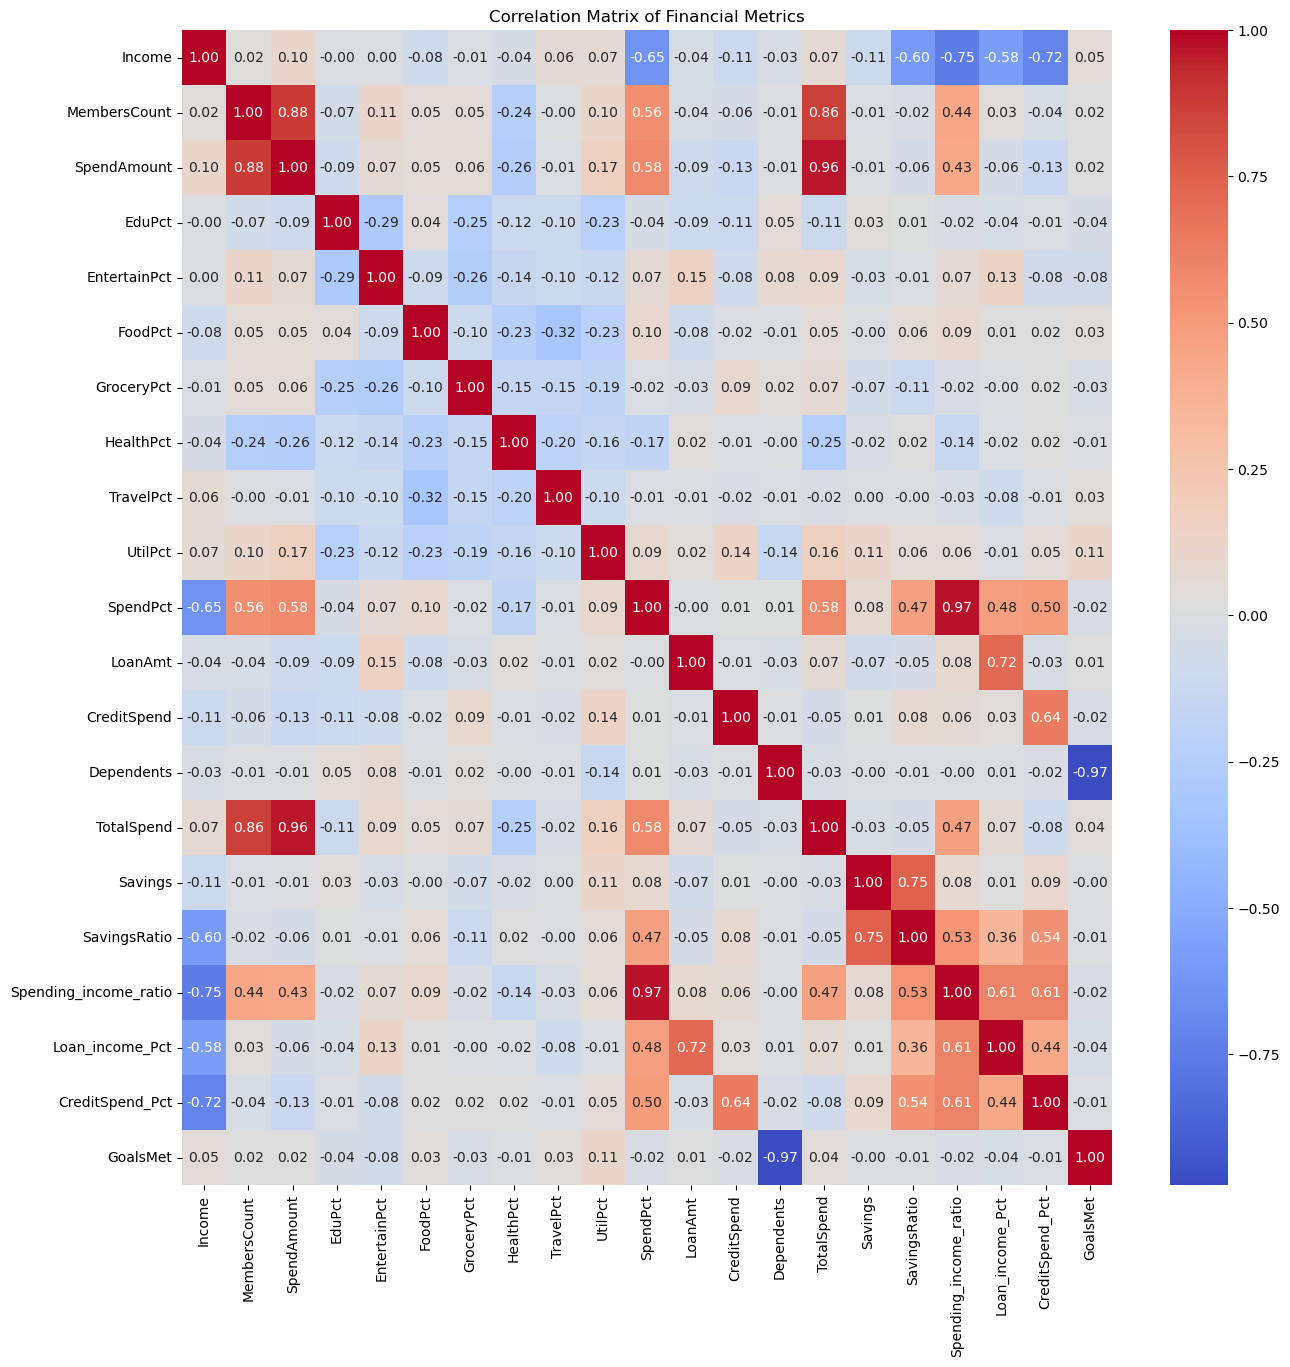

In [112]:

plt.figure(figsize=(15,15))
sns.heatmap(financial_correlation_matrix  , annot = True , cmap='coolwarm' , fmt = '.2f')
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

In [113]:
financial_data.columns

Index(['Income', 'MembersCount', 'SpendAmount', 'EduPct', 'EntertainPct',
       'FoodPct', 'GroceryPct', 'HealthPct', 'TravelPct', 'UtilPct',
       'SpendPct', 'LoanAmt', 'CreditSpend', 'Dependents', 'TotalSpend',
       'Savings', 'SavingsRatio', 'Spending_income_ratio', 'Loan_income_Pct',
       'CreditSpend_Pct', 'GoalsMet'],
      dtype='object')

In [114]:
member_level_insights.head()

Family ID       Member ID   Amount  Family_Income  Monthly_Expenses  \
0    FAM001  FAM001_Member1  6521.20         113810              5781   
1    FAM001  FAM001_Member2  7084.83         113810              5781   
2    FAM001  FAM001_Member3  2119.41         113810              5781   
3    FAM001  FAM001_Member4  7463.46         113810              5781   
4    FAM002  FAM002_Member1  3082.90          44592              5630   

   Credit_Card_Spending  Spending Perscentage  Healthcare  Entertainment  \
0                  2959              5.729901        0.22           0.22   
1                  2959              6.225138        0.10           0.07   
2                  2959              1.862235        0.00           0.27   
3                  2959              6.557824        0.00           0.27   
4                   995              6.913572        0.25           0.08   

   Utilities  Travel  Food  Groceries  Education  
0       0.19    0.11  0.11       0.07       0.07  
1       0.14    0.24  0.21       0.17       0.07  
2       0.09    0.09  0.18       0.09       0.27  
3       0.19    0.15  0.19       0.12       0.08  
4       0.08    0.08  0.25       0.08       0.17

# Spending Distribution Across Categories

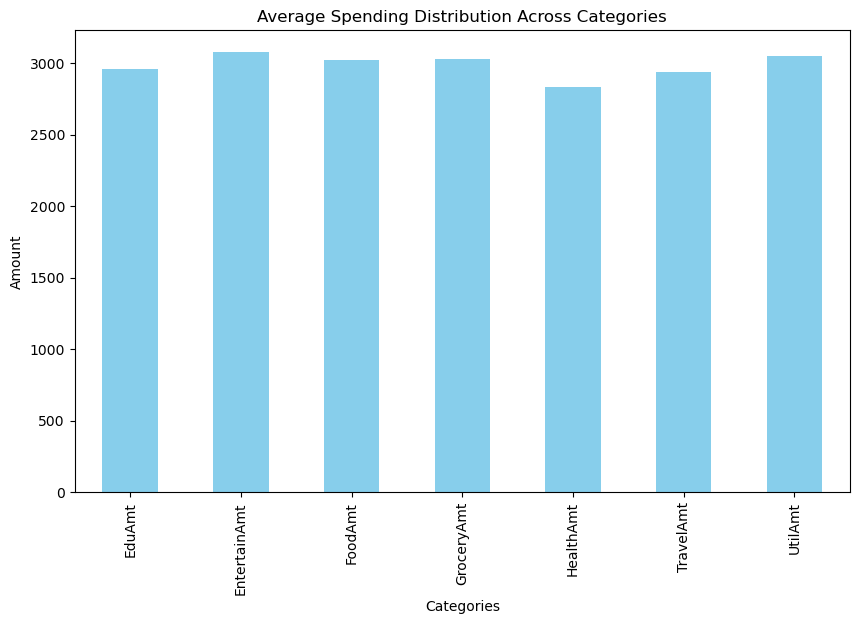

In [115]:


spending_categories = ['EduAmt', 'EntertainAmt', 'FoodAmt', 'GroceryAmt', 'HealthAmt', 'TravelAmt', 'UtilAmt']
dataset[spending_categories].mean().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Average Spending Distribution Across Categories")
plt.ylabel("Amount")
plt.xlabel("Categories")
plt.show()


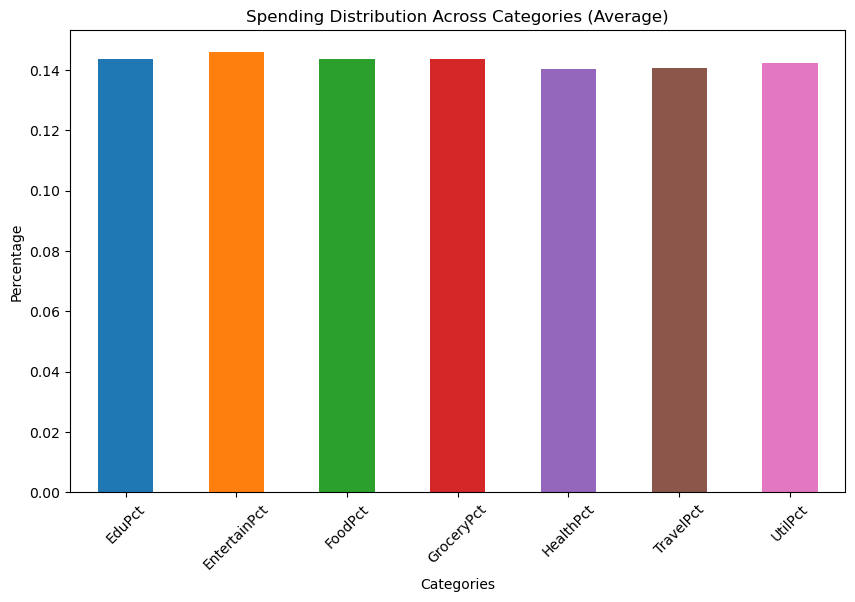

In [116]:

categories = ['EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct', 'HealthPct', 'TravelPct', 'UtilPct']
# Plot a stacked bar chart for spending distribution
financial_data[categories].mean().plot(kind='bar', stacked=True, figsize=(10, 6), color=plt.cm.tab10.colors)

plt.title("Spending Distribution Across Categories (Average)")
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
# plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()


In [117]:
dataset.head()

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  FoodAmt  \
0  FAM001  113810             4     23188.90  2251.01       4168.86  4380.92   
1  FAM002   44592             5     22309.71  1547.02       3397.26  2887.32   
2  FAM003   33278             2     11220.34  2469.63       1458.40   938.98   
3  FAM004  127196             5     23483.10  3979.54       3005.83  5174.30   
4  FAM005   66048             7     40246.21  5921.45       5647.39  4449.05   

   GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  FoodPct  \
0     3410.61    1575.89    4576.81  2824.80    0.10          0.18     0.19   
1     3532.67    3616.79    2321.25  5007.40    0.07          0.15     0.13   
2     1674.84    1093.98    2478.68  1105.83    0.22          0.13     0.08   
3     2626.72    3661.61    3218.79  1816.31    0.17          0.13     0.22   
4     8802.50    3803.65    5773.51  5848.66    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  0.203751     2422         2959   
1        0.16       0.16       0.10     0.22  0.500307     4541          995   
2        0.15       0.10       0.22     0.10  0.337170     1042         2818   
3        0.11       0.16       0.14     0.08  0.184621     1571          668   
4        0.22       0.09       0.14     0.15  0.609348     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  
0             2.13             2.60      0.68  
1            10.18             2.23      0.68  
2             3.13             8.47      0.68  
3             1.24             0.53      0.68  
4             5.21             2.91      0.68

In [118]:
financial_data.head()

Income  MembersCount  SpendAmount  EduPct  EntertainPct  FoodPct  \
0  113810             4     23188.90    0.10          0.18     0.19   
1   44592             5     22309.71    0.07          0.15     0.13   
2   33278             2     11220.34    0.22          0.13     0.08   
3  127196             5     23483.10    0.17          0.13     0.22   
4   66048             7     40246.21    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  0.203751     2422         2959   
1        0.16       0.16       0.10     0.22  0.500307     4541          995   
2        0.15       0.10       0.22     0.10  0.337170     1042         2818   
3        0.11       0.16       0.14     0.08  0.184621     1571          668   
4        0.22       0.09       0.14     0.15  0.609348     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  
0             2.13             2.60      0.68  
1            10.18             2.23      0.68  
2             3.13             8.47      0.68  
3             1.24             0.53      0.68  
4             5.21             2.91      0.68

In [119]:
dataset.columns

Index(['FamID', 'Income', 'MembersCount', 'SpendAmount', 'EduAmt',
       'EntertainAmt', 'FoodAmt', 'GroceryAmt', 'HealthAmt', 'TravelAmt',
       'UtilAmt', 'EduPct', 'EntertainPct', 'FoodPct', 'GroceryPct',
       'HealthPct', 'TravelPct', 'UtilPct', 'SpendPct', 'LoanAmt',
       'CreditSpend', 'Dependents', 'TotalSpend', 'Savings', 'SavingsRatio',
       'Spending_income_ratio', 'Loan_income_Pct', 'CreditSpend_Pct',
       'GoalsMet'],
      dtype='object')

In [120]:
dataset['Essential_Spending_Pct']  =  (dataset['FoodPct'] + dataset['GroceryPct'] + dataset['UtilPct'] +dataset['EduPct'] +dataset['HealthPct'])

In [121]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  \
0    4380.92     3410.61    1575.89    4576.81  2824.80    0.10          0.18   
1    2887.32     3532.67    3616.79    2321.25  5007.40    0.07          0.15   
2     938.98     1674.84    1093.98    2478.68  1105.83    0.22          0.13   
3    5174.30     2626.72    3661.61    3218.79  1816.31    0.17          0.13   
4    4449.05     8802.50    3803.65    5773.51  5848.66    0.15          0.14   
..       ...         ...        ...        ...      ...     ...           ...   
195  5478.41     5953.19    6707.40    4104.09  3222.80    0.12          0.07   
196   842.95      176.34    1153.77     295.66   477.08    0.16          0.11   
197  2462.23     3607.81    2655.81    3536.51  1774.76    0.10          0.18   
198  5155.01     4668.34    2861.65    3704.75  7024.86    0.10          0.14   
199  4154.26     1624.38    2149.66    4744.98  5112.73    0.12          0.17   

     FoodPct  GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  \
0       0.19        0.15       0.07       0.20     0.12  0.203751     2422   
1       0.13        0.16       0.16       0.10     0.22  0.500307     4541   
2       0.08        0.15       0.10       0.22     0.10  0.337170     1042   
3       0.22        0.11       0.16       0.14     0.08  0.184621     1571   
4       0.11        0.22       0.09       0.14     0.15  0.609348     3444   
..       ...         ...        ...        ...      ...       ...      ...   
195     0.17        0.19       0.21       0.13     0.10  0.483791      622   
196     0.21        0.04       0.29       0.07     0.12  0.030846     4850   
197     0.13        0.19       0.14       0.18     0.09  0.169970     1989   
198     0.17        0.15       0.09       0.12     0.23  0.415751      834   
199     0.17        0.07       0.09       0.19     0.21  0.557763     2470   

     CreditSpend  Dependents  TotalSpend  Savings  SavingsRatio  \
0           2959           2    34350.90    20234      0.177788   
1            995           2    33475.71    29492      0.661374   
2           2818           2    20362.34    11365      0.341517   
3            668           2    29313.10    30735      0.241635   
4           1922           2    48748.21     1212      0.018350   
..           ...         ...         ...      ...           ...   
195          744           0    36332.34     3604      0.055469   
196         1179           0    16524.82    41591      0.318117   
197         1759           0    27471.59     6372      0.055889   
198         2937           0    38452.65    28474      0.381756   
199         2831           0    34484.93    44081      0.987898   

     Spending_income_ratio  Loan_income_Pct  CreditSpend_Pct  GoalsMet  \
0                     0.30             2.13             2.60      0.68   
1                     0.75            10.18             2.23      0.68   
2                     0.61             3.13             8.47      0.68   
3                     0.23             1.24             0.53      0.68   
4                     0.74             5.21 

In [122]:
dataset['NonEssential_Spending_Pct'] = (dataset['TravelPct'] + dataset['EntertainPct'])


In [123]:
dataset

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  \
0    FAM001  113810             4     23188.90  2251.01       4168.86   
1    FAM002   44592             5     22309.71  1547.02       3397.26   
2    FAM003   33278             2     11220.34  2469.63       1458.40   
3    FAM004  127196             5     23483.10  3979.54       3005.83   
4    FAM005   66048             7     40246.21  5921.45       5647.39   
..      ...     ...           ...          ...      ...           ...   
195  FAM196   64973             7     31433.34  3654.91       2312.54   
196  FAM197  130741             2      4032.82   649.13        437.89   
197  FAM198  114012             4     19378.59  1888.18       3453.29   
198  FAM199   74587             7     31009.65  3183.50       4411.54   
199  FAM200   44621             6     24887.93  2939.31       4162.61   

     FoodAmt  GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  \
0    4380.92     3410.61    1575.89    4576.81  2824.80    0.10          0.18   
1    2887.32     3532.67    3616.79    2321.25  5007.40    0.07          0.15   
2     938.98     1674.84    1093.98    2478.68  1105.83    0.22          0.13   
3    5174.30     2626.72    3661.61    3218.79  1816.31    0.17          0.13   
4    4449.05     8802.50    3803.65    5773.51  5848.66    0.15          0.14   
..       ...         ...        ...        ...      ...     ...           ...   
195  5478.41     5953.19    6707.40    4104.09  3222.80    0.12          0.07   
196   842.95      176.34    1153.77     295.66   477.08    0.16          0.11   
197  2462.23     3607.81    2655.81    3536.51  1774.76    0.10          0.18   
198  5155.01     4668.34    2861.65    3704.75  7024.86    0.10          0.14   
199  4154.26     1624.38    2149.66    4744.98  5112.73    0.12          0.17   

     FoodPct  GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  \
0       0.19        0.15       0.07       0.20     0.12  0.203751     2422   
1       0.13        0.16       0.16       0.10     0.22  0.500307     4541   
2       0.08        0.15       0.10       0.22     0.10  0.337170     1042   
3       0.22        0.11       0.16       0.14     0.08  0.184621     1571   
4       0.11        0.22       0.09       0.14     0.15  0.609348     3444   
..       ...         ...        ...        ...      ...       ...      ...   
195     0.17        0.19       0.21       0.13     0.10  0.483791      622   
196     0.21        0.04       0.29       0.07     0.12  0.030846     4850   
197     0.13        0.19       0.14       0.18     0.09  0.169970     1989   
198     0.17        0.15       0.09       0.12     0.23  0.415751      834   
199     0.17        0.07       0.09       0.19     0.21  0.557763     2470   

     CreditSpend  Dependents  TotalSpend  Savings  SavingsRatio  \
0           2959           2    34350.90    20234      0.177788   
1            995           2    33475.71    29492      0.661374   
2           2818           2    20362.34    11365      0.341517   
3            668           2    29313.10    30735      0.241635   
4           1922           2    48748.21     1212      0.018350   
..           ...         ...         ...      ...           ...   
195          744           0    36332.34     3604      0.055469   
196         1179           0    16524.82    41591      0.318117   
197         1759           0    27471.59     6372      0.055889   
198         2937           0    38452.65    28474      0.381756   
199         2831           0    34484.93    44081      0.987898   

     Spending_income_ratio  Loan_income_Pct  CreditSpend_Pct  GoalsMet  \
0                     0.30             2.13             2.60      0.68   
1                     0.75            10.18             2.23      0.68   
2                     0.61             3.13             8.47      0.68   
3                     0.23             1.24             0.53      0.68   
4                     0.74             5.21 

In [124]:
dataset = pd.concat([dataset , family_level_insights['Monthly_Expenses']], axis=1)
dataset.head()

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  FoodAmt  \
0  FAM001  113810             4     23188.90  2251.01       4168.86  4380.92   
1  FAM002   44592             5     22309.71  1547.02       3397.26  2887.32   
2  FAM003   33278             2     11220.34  2469.63       1458.40   938.98   
3  FAM004  127196             5     23483.10  3979.54       3005.83  5174.30   
4  FAM005   66048             7     40246.21  5921.45       5647.39  4449.05   

   GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  FoodPct  \
0     3410.61    1575.89    4576.81  2824.80    0.10          0.18     0.19   
1     3532.67    3616.79    2321.25  5007.40    0.07          0.15     0.13   
2     1674.84    1093.98    2478.68  1105.83    0.22          0.13     0.08   
3     2626.72    3661.61    3218.79  1816.31    0.17          0.13     0.22   
4     8802.50    3803.65    5773.51  5848.66    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  0.203751     2422         2959   
1        0.16       0.16       0.10     0.22  0.500307     4541          995   
2        0.15       0.10       0.22     0.10  0.337170     1042         2818   
3        0.11       0.16       0.14     0.08  0.184621     1571          668   
4        0.22       0.09       0.14     0.15  0.609348     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  Essential_Spending_Pct  \
0             2.13             2.60      0.68                    0.63   
1            10.18             2.23      0.68                    0.74   
2             3.13             8.47      0.68                    0.65   
3             1.24             0.53      0.68                    0.74   
4             5.21             2.91      0.68                    0.72   

   NonEssential_Spending_Pct  Monthly_Expenses  
0                       0.38              5781  
1                       0.25              5630  
2                       0.35              5282  
3                       0.27              3591  
4                       0.28              3136

In [125]:
dataset['Monthly_Expenses_to_Income'] = (dataset['Monthly_Expenses'] / dataset['Income']).round(3)

In [126]:
dataset.head()

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  FoodAmt  \
0  FAM001  113810             4     23188.90  2251.01       4168.86  4380.92   
1  FAM002   44592             5     22309.71  1547.02       3397.26  2887.32   
2  FAM003   33278             2     11220.34  2469.63       1458.40   938.98   
3  FAM004  127196             5     23483.10  3979.54       3005.83  5174.30   
4  FAM005   66048             7     40246.21  5921.45       5647.39  4449.05   

   GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  FoodPct  \
0     3410.61    1575.89    4576.81  2824.80    0.10          0.18     0.19   
1     3532.67    3616.79    2321.25  5007.40    0.07          0.15     0.13   
2     1674.84    1093.98    2478.68  1105.83    0.22          0.13     0.08   
3     2626.72    3661.61    3218.79  1816.31    0.17          0.13     0.22   
4     8802.50    3803.65    5773.51  5848.66    0.15          0.14     0.11   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07       0.20     0.12  0.203751     2422         2959   
1        0.16       0.16       0.10     0.22  0.500307     4541          995   
2        0.15       0.10       0.22     0.10  0.337170     1042         2818   
3        0.11       0.16       0.14     0.08  0.184621     1571          668   
4        0.22       0.09       0.14     0.15  0.609348     3444         1922   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   
2           2    20362.34    11365      0.341517                   0.61   
3           2    29313.10    30735      0.241635                   0.23   
4           2    48748.21     1212      0.018350                   0.74   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  Essential_Spending_Pct  \
0             2.13             2.60      0.68                    0.63   
1            10.18             2.23      0.68                    0.74   
2             3.13             8.47      0.68                    0.65   
3             1.24             0.53      0.68                    0.74   
4             5.21             2.91      0.68                    0.72   

   NonEssential_Spending_Pct  Monthly_Expenses  Monthly_Expenses_to_Income  
0                       0.38              5781                       0.051  
1                       0.25              5630                       0.126  
2                       0.35              5282                       0.159  
3                       0.27              3591                       0.028  
4                       0.28              3136                       0.047

In [127]:
dataset['Loan_income_Pct'] = dataset['Loan_income_Pct']/100

In [128]:
dataset['CreditSpend_Pct'] = dataset['CreditSpend_Pct']/100

# Scoring Mechanism 

In [193]:
def calculate_score(row):
    insights = []
    recommendations = []

    # Calculate the Savings Score (25 Points)
    ideal_savings_ratio = 0.2  # Ideal is 20%
    savings_score = min(row['SavingsRatio'] * 125, 25)
    if row['SavingsRatio'] < ideal_savings_ratio:
        points_lost = 25 - savings_score
        insights.append(
            f"Savings-to-Income ratio is {row['SavingsRatio']:.2%}, below the recommended {ideal_savings_ratio:.2%}, reducing your score by {points_lost:.1f} points."
        )
        recommendations.append(
            f"Increase savings by reallocating discretionary spending. Raising SavingsRatio to 0.20 can improve your score by {points_lost:.1f} points."
        )
    else:
        insights.append("Savings Ratio is Good, Keep Saving!")
        recommendations.append("Your savings are within a good range. Maintain this to preserve your score.")

    # Calculate Loan Score (15 Points)
    ideal_loan_ratio = 0.2  # Ideal is 20%
    loan_ratio = min(row['Loan_income_Pct'], 1)  # Cap at 100%
    loan_score = max(0, (1 - loan_ratio) * 15)  # Change the base to 15 points
    loan_score = min(loan_score, 15)  # Ensure loan_score does not exceed 15

    if row['Loan_income_Pct'] > ideal_loan_ratio:
        points_lost = 15 - loan_score
        insights.append(
            f"Loan payments are {row['Loan_income_Pct']:.2%} of income, above the recommended {ideal_loan_ratio:.2%}, reducing your score by {points_lost:.1f} points."
        )
        recommendations.append(
            f"Focus on loan repayment to reduce Loan_income_Pct to below 20%. This can improve your score by {points_lost:.1f} points."
        )
    else:
        insights.append("Loan Ratio is Good, Keep It Up!")
        recommendations.append("Your loan ratio is within the ideal range. Maintain this to preserve your score.")

    # Calculate Credit Score (15 Points)
    ideal_credit_ratio = 0.3  # Ideal is 30%
    credit_score = max(0, (1 - row['CreditSpend_Pct']) * 15)
    credit_score = min(max(0, credit_score), 15)  # Cap credit score to 15

    if row['CreditSpend_Pct'] > ideal_credit_ratio:
        points_lost = 15 - credit_score
        insights.append(
            f"Credit card spending is {row['CreditSpend_Pct']:.2%} of income, exceeding the ideal {ideal_credit_ratio:.2%}, reducing your score by {points_lost:.1f} points."
        )
        recommendations.append(
            f"Reduce credit card usage to bring CreditSpend_Pct to below 30%. This can improve your score by {points_lost:.1f} points."
        )
    else:
        insights.append("Credit Spending Ratio is Good, Keep It Up! ")
        recommendations.append("Your credit card spending is within the ideal range. Maintain this to preserve your score.")

    # Calculate Category Score (15 Points)
    essential_score = max(0, (1 - row['Essential_Spending_Pct']) * 7.5)
    non_essential_score = max(0, (1 - row['NonEssential_Spending_Pct']) * 7.5)
    category_score = essential_score + non_essential_score

    if essential_score < non_essential_score:
        points_lost = 15 - category_score
        insights.append(
            f"Non-essential spending ({row['NonEssential_Spending_Pct']:.2%}) exceeds essential spending ({row['Essential_Spending_Pct']:.2%}), lowering your score."
        )
        recommendations.append(
            f"Reallocate spending to increase essential spending. Reducing non-essential spending by 10% can improve your score by approximately {points_lost:.1f} points."
        )
    else:
        insights.append("Essential Spending Ratio is Good, Keep It Up!")
        recommendations.append("Your essential spending is within the ideal range. Maintain this to preserve your score.")

    # Calculate Monthly Expenses Score (20 Points)
    monthly_expense_score = max(0, (1 - row['Monthly_Expenses_to_Income']) * 20)
    monthly_expense_ratio = 0.5
    if row['Monthly_Expenses_to_Income'] > monthly_expense_ratio:  # Ideal expense ratio is 50%
        points_lost = 20 - monthly_expense_score
        insights.append(
            f"Monthly expenses are {row['Monthly_Expenses_to_Income']:.2%} of income, exceeding the ideal 50%, reducing your score by {points_lost:.1f} points."
        )
        recommendations.append(
            f"Reduce monthly expenses, especially non-essential spending, to below 50% of income. This can improve your score by {points_lost:.1f} points."
        )
    else:
        insights.append(f"Monthly Expenses Spending Ratio is {row['Monthly_Expenses_to_Income']:.2%} it is  Good, Keep It Up!")
        recommendations.append(f"Your Monthly  Expenses  spending  is {row['Monthly_Expenses_to_Income']:.2%} within the ideal range 50%. Maintain this to preserve your score.")

    # Calculate Goal Score (10 Points)
    goal_score = row['GoalsMet'] * 0.1
    print(goal_score)
    if row['GoalsMet'] < 100:
        points_lost = 10 - goal_score
        insights.append(
            f"Only {row['GoalsMet']}% of financial goals met, which affects your score by {points_lost:.1f} points."
        )
        recommendations.append(
            f"Work towards achieving more financial goals. Increasing GoalsMet to 100% can improve your score by {points_lost:.1f} points."
        )
    else:
        insights.append("Goal Score is  Good, Keep It Up!, Increase Goals Meet to increase {points_lost:.f} Points")
        recommendations.append("Your Goalmet percentage  is within the ideal range . Maintain this to preserve your score.")


    # Calculate Total Score (out of 100)
    points = {'Savings Score':savings_score ,'Monthly Expense Score': monthly_expense_score ,'Essential Spending Score':essential_score , 'Non Essentianl Spending Score':non_essential_score,'Loan Score': loan_score ,"Credit Score": credit_score ,"Category Score": category_score , 'Goal Score': goal_score }
    total_score = savings_score + monthly_expense_score + loan_score + credit_score + category_score + goal_score
    total_score = min(max(total_score, 1), 100)
    # print(savings_score + monthly_expense_score + loan_score + credit_score + category_score + goal_score)

    # Return the final score, insights, and recommendations
    return points , total_score, " ".join(insights), " ".join(recommendations)

In [130]:
dataset['Financial_Score'], dataset['Insights'], dataset['Recommendations'] = zip(*dataset.apply(calculate_score, axis=1))

# Display results
Score_dataset = dataset[['FamID', 'Financial_Score', 'Insights', 'Recommendations']]

In [131]:
Score_dataset.max()[2]

/tmp/ipykernel_11265/1628890921.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Score_dataset.max()[2]


'Savings-to-Income ratio is 9.98%, below the recommended 20.00%, reducing your score by 12.5 points. Loan Ratio is Good, Keep It Up! Credit Spending Ratio is Good, Keep It Up!  Non-essential spending (37.00%) exceeds essential spending (63.00%), lowering your score. Monthly Expenses Spending Ratio is Good, Keep It Up! Only 0.6% of financial goals met, which affects your score by 4.0 points.'

# Final Dataste Contain the Spending Savings and Financial Score , Insights  , Recommendation 

In [132]:
dataset.head(2)

FamID  Income  MembersCount  SpendAmount   EduAmt  EntertainAmt  FoodAmt  \
0  FAM001  113810             4     23188.90  2251.01       4168.86  4380.92   
1  FAM002   44592             5     22309.71  1547.02       3397.26  2887.32   

   GroceryAmt  HealthAmt  TravelAmt  UtilAmt  EduPct  EntertainPct  FoodPct  \
0     3410.61    1575.89    4576.81   2824.8    0.10          0.18     0.19   
1     3532.67    3616.79    2321.25   5007.4    0.07          0.15     0.13   

   GroceryPct  HealthPct  TravelPct  UtilPct  SpendPct  LoanAmt  CreditSpend  \
0        0.15       0.07        0.2     0.12  0.203751     2422         2959   
1        0.16       0.16        0.1     0.22  0.500307     4541          995   

   Dependents  TotalSpend  Savings  SavingsRatio  Spending_income_ratio  \
0           2    34350.90    20234      0.177788                   0.30   
1           2    33475.71    29492      0.661374                   0.75   

   Loan_income_Pct  CreditSpend_Pct  GoalsMet  Essential_Spending_Pct  \
0           0.0213           0.0260      0.68                    0.63   
1           0.1018           0.0223      0.68                    0.74   

   NonEssential_Spending_Pct  Monthly_Expenses  Monthly_Expenses_to_Income  \
0                       0.38              5781                       0.051   
1                       0.25              5630                       0.126   

   Financial_Score                                           Insights  \
0        84.718943  Savings-to-Income ratio is 17.78%, below the r...   
1        84.993500  Savings Ratio is Good, Keep Saving! Loan Ratio...   

                                     Recommendations  
0  Increase savings by reallocating discretionary...  
1  Your savings are within a good range. Maintain...

# Family Wise Financial score Visualization

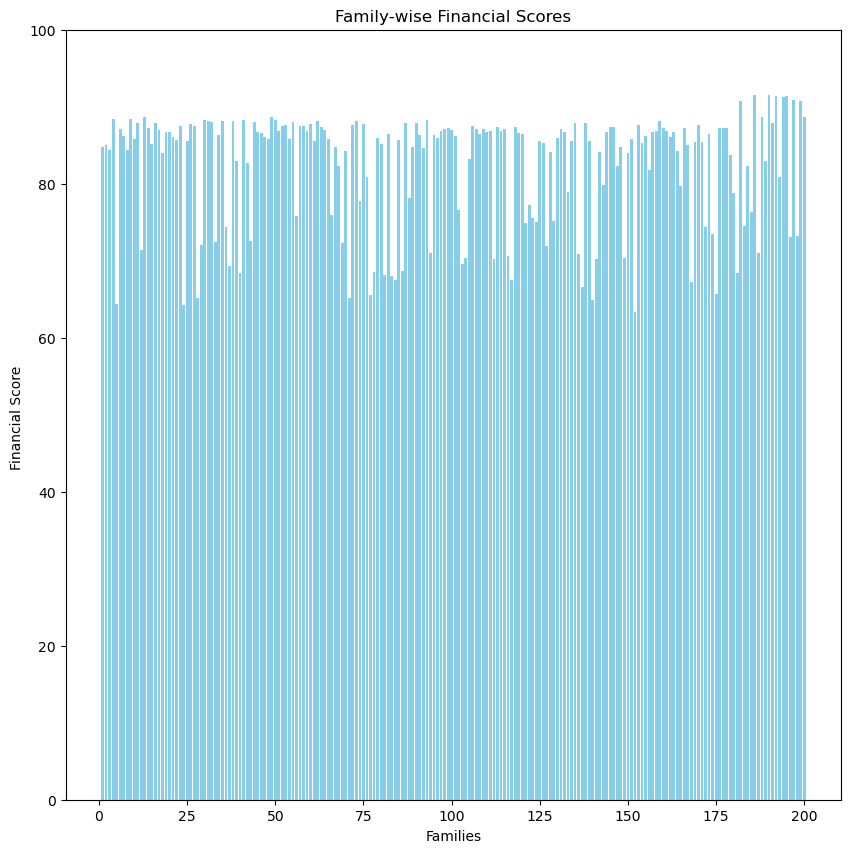

In [138]:
family_count  = [ i for i in range(1,201)] # Family Index for better visualizations 
plt.figure(figsize=(10, 10))
plt.bar( family_count,dataset['Financial_Score'] , color  = 'skyblue')
plt.xlabel("Families")
plt.ylabel('Financial Score ')
plt.title('Family-wise Financial Scores')
plt.ylim(0, 100)
plt.show()

In [147]:
dataset['Financial_Score'].min()

63.39833922458028

In [194]:
calculate_score({"SavingsRatio": 0.2, 
                  "Loan_income_Pct": 0.1,
                    "CreditSpend_Pct": 0.25,
                      "Essential_Spending_Pct": 0.4,
                        "NonEssential_Spending_Pct": 0.3,
                          "Monthly_Expenses_to_Income": 0.5, 
                          "GoalsMet": 80})


8.0


({'Savings Score': 25.0,
  'Monthly Expense Score': 10.0,
  'Essential Spending Score': 4.5,
  'Non Essentianl Spending Score': 5.25,
  'Loan Score': 13.5,
  'Credit Score': 11.25,
  'Category Score': 9.75,
  'Goal Score': 8.0},
 77.5,
 'Savings Ratio is Good, Keep Saving! Loan Ratio is Good, Keep It Up! Credit Spending Ratio is Good, Keep It Up!  Non-essential spending (30.00%) exceeds essential spending (40.00%), lowering your score. Monthly Expenses Spending Ratio is 50.00% it is  Good, Keep It Up! Only 80% of financial goals met, which affects your score by 2.0 points.',
 'Your savings are within a good range. Maintain this to preserve your score. Your loan ratio is within the ideal range. Maintain this to preserve your score. Your credit card spending is within the ideal range. Maintain this to preserve your score. Reallocate spending to increase essential spending. Reducing non-essential spending by 10% can improve your score by approximately 5.2 points. Your Monthly  Expenses  s

In [196]:
# Run this cell after you run the app.py file to check the flask app is work correctly or not 
!curl -X POST -H 'Content-Type:application/json' -d'{"SavingsRatio": 0.2, "Loan_income_Pct": 0.1,"CreditSpend_Pct": 0.25,"Essential_Spending_Pct": 0.4,"NonEssential_Spending_Pct": 0.3,"Monthly_Expenses_to_Income": 0.5, "GoalsMet": 80}' http://127.0.0.1:5000/score

{
  "Score Board": {
    "Category Score": 9.75,
    "Credit Score": 11.25,
    "Essential Spending Score": 4.5,
    "Goal Score": 8.0,
    "Loan Score": 13.5,
    "Monthly Expense Score": 10.0,
    "Non Essentianl Spending Score": 5.25,
    "Savings Score": 25.0
  },
  "insights": "Savings Ratio is Good, Keep Saving! Loan Ratio is Good, Keep It Up! Credit Spending Ratio is Good, Keep It Up!  Non-essential spending (30.00%) exceeds essential spending (40.00%), lowering your score. Monthly Expenses Spending Ratio is 50.00% it is  Good, Keep It Up! Only 80.0% of financial goals met, which affects your score by 2.0 points.",
  "recommendations": "Your savings are within a good range. Maintain this to preserve your score. Your loan ratio is within the ideal range. Maintain this to preserve your score. Your credit card spending is within the ideal range. Maintain this to preserve your score. Reallocate spending to increase essential spending. Reducing non-essential spending by 10% can impro